# PROJET ANALYSE DE DONNEES
## Etude des stations de location de vélos dans Paris

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import plotly.express as px
import plotly.express as px

%matplotlib inline

Dans ce notebook, nous allons étudier un jeu de données contenant des informations concernant les taux de disponibilités des vélos dans des stations parisiennes.Nous avons accés à ce taux pour toutes les heures de chaque jour de la semaine sur la période du 2 septembre au 7 septembre 2014.

Une remarque importante pour comprendre au mieux le sujet est que plus le taux est proche de 1 plus la station a de vélos disponibles. Inversement, quand ce taux est proche de 0 alors il y a de moins en moins de vélos libres dans la station.

## 1. Présentation des données

Nous allons ici importer toutes les données mises à notre disposition.

In [2]:
#loading = pd.read_csv('velibLoading.csv', sep = " ")
loading = pd.read_csv('data/velibLoading.csv', sep = " ")
loading

,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
1,0.038462,0.038462,0.076923,0.038462,0.038462,0.038462,0.038462,0.038462,0.107143,0.000000,...,0.296296,0.111111,0.111111,0.148148,0.307692,0.076923,0.115385,0.076923,0.153846,0.153846
2,0.478261,0.478261,0.478261,0.434783,0.434783,0.434783,0.434783,0.434783,0.260870,0.043478,...,0.043478,0.000000,0.217391,0.130435,0.045455,0.173913,0.173913,0.173913,0.260870,0.391304
3,0.218182,0.145455,0.127273,0.109091,0.109091,0.109091,0.090909,0.090909,0.054545,0.109091,...,0.259259,0.259259,0.203704,0.129630,0.148148,0.296296,0.314815,0.370370,0.370370,0.407407
4,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.904762,0.857143,0.857143,0.857143,0.761905,0.761905,0.761905,0.761905
5,0.927536,0.811594,0.739130,0.724638,0.724638,0.724638,0.724638,0.724638,0.753623,0.971014,...,0.227273,0.454545,0.590909,0.833333,1.000000,0.818182,0.636364,0.712121,0.621212,0.575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.090909,0.136364,0.000000,...,0.043478,0.173913,0.043478,0.086957,0.086957,0.304348,0.304348,0.130435,0.086957,0.086957
1186,0.200000,0.133333,0.155556,0.177778,0.177778,0.177778,0.200000,0.177778,0.288889,0.511111,...,0.266667,0.288889,0.155556,0.222222,0.333333,0.311111,0.355556,0.377778,0.333333,0.355556
1187,0.551724,0.517241,0.551724,0.517241,0.517241,0.551724,0.551724,0.448276,0.241379,0.034483,...,0.482759,0.310345,0.000000,0.000000,0.103448,0.379310,0.310345,0.310345,0.344828,0.482759
1188,0.476190,0.428571,0.428571,0.428571,0.428571,0.428571,0.476190,0.523810,0.428571,0.476190,...,0.880000,0.760000,0.750000,0.958333,1.000000,0.791667,0.791667,0.500000,0.434783,0.478261


Il y a 168 colonnes qui représentent le total des heures dans une semaine. Les 1189 lignes correspondent aux données de toutes les stations de Paris que nous étudions ici.

Le jeu de données contient : \
1 - data : le profil de chargement des 1189 stations à 181 heures différentes. Un chargement de 1 veut dire que la station est pleine de vélos alors qu'un chargement de 0 indique une station vide. \
2 - position : la latitude et la longitude des 1189 stations \
3 - dates : la date de téléchargement \
4 - bonus : si bonus=1, la station est en altitude et si bonus=0 elle ne l'est pas \
5 - names : le nom des stations

In [3]:
loading.describe()

,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,...,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,0.401503,0.408770,0.411718,0.415161,0.417136,0.421650,0.419860,0.415729,0.384658,0.326331,...,0.346147,0.325526,0.311334,0.306399,0.314730,0.334080,0.353493,0.385975,0.392552,0.397529
std,0.337079,0.335566,0.336132,0.337158,0.332237,0.326644,0.323422,0.319302,0.303621,0.314026,...,0.340516,0.339897,0.336863,0.331194,0.322904,0.317279,0.317572,0.328448,0.335061,0.341536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.093750,0.093023,0.096774,0.100000,0.108696,0.114286,0.114286,0.117647,0.114286,0.047619,...,0.051282,0.041667,0.038462,0.043478,0.052632,0.071429,0.080000,0.095238,0.086957,0.090909
50%,0.312500,0.333333,0.342857,0.350000,0.357143,0.363636,0.360000,0.360000,0.320000,0.215385,...,0.204082,0.166667,0.151515,0.142857,0.172414,0.200000,0.238095,0.285714,0.292683,0.292683
75%,0.694444,0.705882,0.708333,0.710526,0.700000,0.700000,0.700000,0.687500,0.636364,0.575000,...,0.651163,0.608696,0.555556,0.550000,0.550000,0.558140,0.600000,0.666667,0.666667,0.692308
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Les 168 colonnes represéntent comme précedemment chaque heure d'une semaine. Les lignes correspondent à differentes données calculées sur toutes les stations chaque heure.

Nous allons maintenant importer les coordonnées géographiques de chaque station. 

In [4]:
#coord = pd.read_csv('velibCoord.csv', sep = " ")
coord = pd.read_csv('data/velibCoord.csv', sep = " ")

coord.head()

,longitude,latitude,bonus,names
1,2.377389,48.886300,0,EURYALE DEHAYNIN
2,2.317591,48.890020,0,LEMERCIER
3,2.330447,48.850297,0,MEZIERES RENNES
4,2.271396,48.833734,0,FARMAN
5,2.366897,48.845887,0,QUAI DE LA RAPEE


Grace à la commande ".head", nous avons affiché seulement les 5 premières lignes du tableau "coord".

Nous regardons dans cette cellule si certaines données sont manquantes, si certaines cases sont vides. 

In [5]:
print("Nombre de données manquantes dans 'loading':")
print(loading.isna().sum().sum())
print("Nombre de données manquantes dans 'coord':")
print(coord.isna().sum().sum())

Nombre de données manquantes dans 'loading':
0
Nombre de données manquantes dans 'coord':
0


Or ici, le résultat obtenu pour chaque tableau "loading" et "coord" est 0, il n'y a donc pas de donnée manquante ! 

In [6]:
loading_missing_value = loading.isna().sum().sort_values(ascending=False)

print("--- Somme des valeurs manquantes dans 'Loading' ---")
print(loading_missing_value.sum())

# --- #
print('')

coord_missing_value = coord.isna().sum().sort_values(ascending=False)

print("--- Somme des valeurs manquantes dans 'Coord' ---")
print(coord_missing_value)

--- Somme des valeurs manquantes dans 'Loading' ---
0

--- Somme des valeurs manquantes dans 'Coord' ---
longitude    0
latitude     0
bonus        0
names        0
dtype: int64


Nous affichons ici le nombre d'occurences de chaque station dans nos données.

In [7]:
print("---Données duppliquées---")
station_name = coord.names.value_counts()
print(station_name)

---Données duppliquées---
 PORTE DES LILAS                 3
 GARE D'AUSTERLITZ               3
 PORTE DE BAGNOLET               2
 CHERCHE MIDI                    2
 LEGENDRE                        2
                                ..
 BEL AIR                         1
 ASSAS LUXEMBOURG                1
 COURS DE VINCENNES BD DAVOUT    1
 RUISSEAU ORDENER                1
 QUAI VOLTAIRE                   1
Name: names, Length: 1161, dtype: int64


Le tableau ci-dessous illustre le fait qu'il y a des stations qui portent le même nom. De plus, on voit que le même si le nom de la station apparaît trois fois dans notre jeu de données, celle-ci ne correspond pas aux mêmes coordonnées géographiques. Cela nous montre bien qu'il ne faut pas supprimer des lignes car même si les stations ont le même nom elles n'ont pas les mêmes caractéristiques géographiques.

In [8]:
name = station_name.index[0]
coord[coord.names == name]

,longitude,latitude,bonus,names
362,2.404770,48.876604,1,PORTE DES LILAS
450,2.405960,48.875412,1,PORTE DES LILAS
957,2.411046,48.878099,1,PORTE DES LILAS


## 2. Analyse descriptive des données

Afin de poursuivre notre analyse nous allons nous pencher sur le point de vue descriptif.

Observons tout d'abord que les différentes moyennes des stations ne sont pas du tout homogène, et qu'il est donc, intéressant de regarder d'un peu plus près les différentes moyennes observées pour avoir une vision globale de l'impact des heures, jours et de la localisation des stations sur la comportement d'utilisation.

En effet, dans le graphe suivant, il est possible de voir que le taux de chargement moyen varie grandement d'une station à une autre.

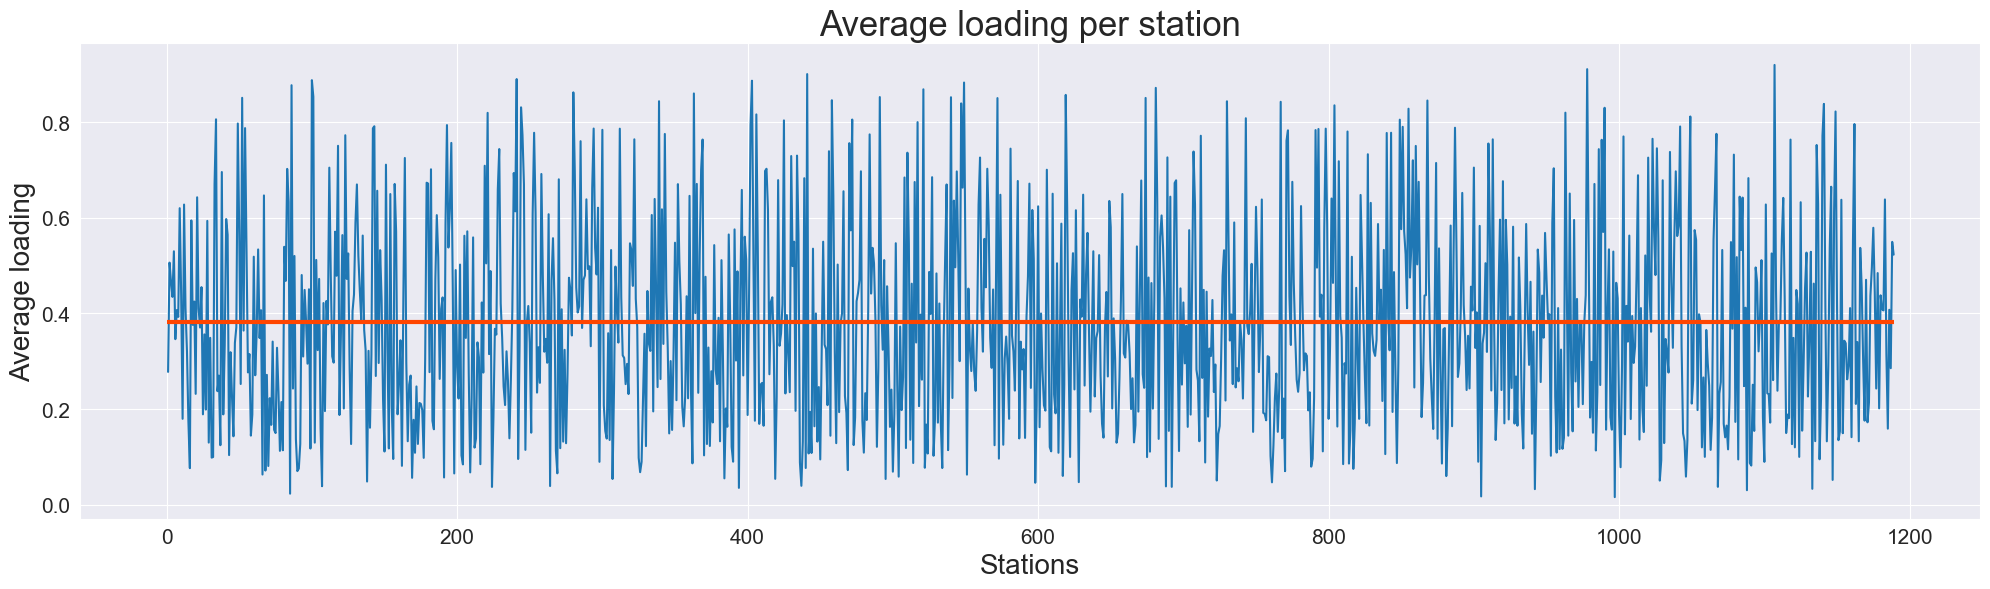

In [9]:
loading_mean = pd.Series(loading.mean(axis=1))
# %load solutions/Python/plot_mean_stations.py
n_stations = loading.shape[0]  # number of observed stations
stations   = np.arange(n_stations)

plt.figure(figsize = (20,6))

# --- #

plt.plot(loading_mean)
plt.hlines(y = loading.mean().mean(), xmin=0, xmax=n_stations, 
           colors = "OrangeRed", linewidth = 3)

# --- #

plt.xlabel('Stations', fontsize = 20)
plt.ylabel('Average loading', fontsize = 20)
plt.title("Average loading per station", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.tight_layout()
plt.show()

Pour visualiser un peu mieux ces taux de chargement on affiche aussi des taux pour 16 stations pris aléatoirement.

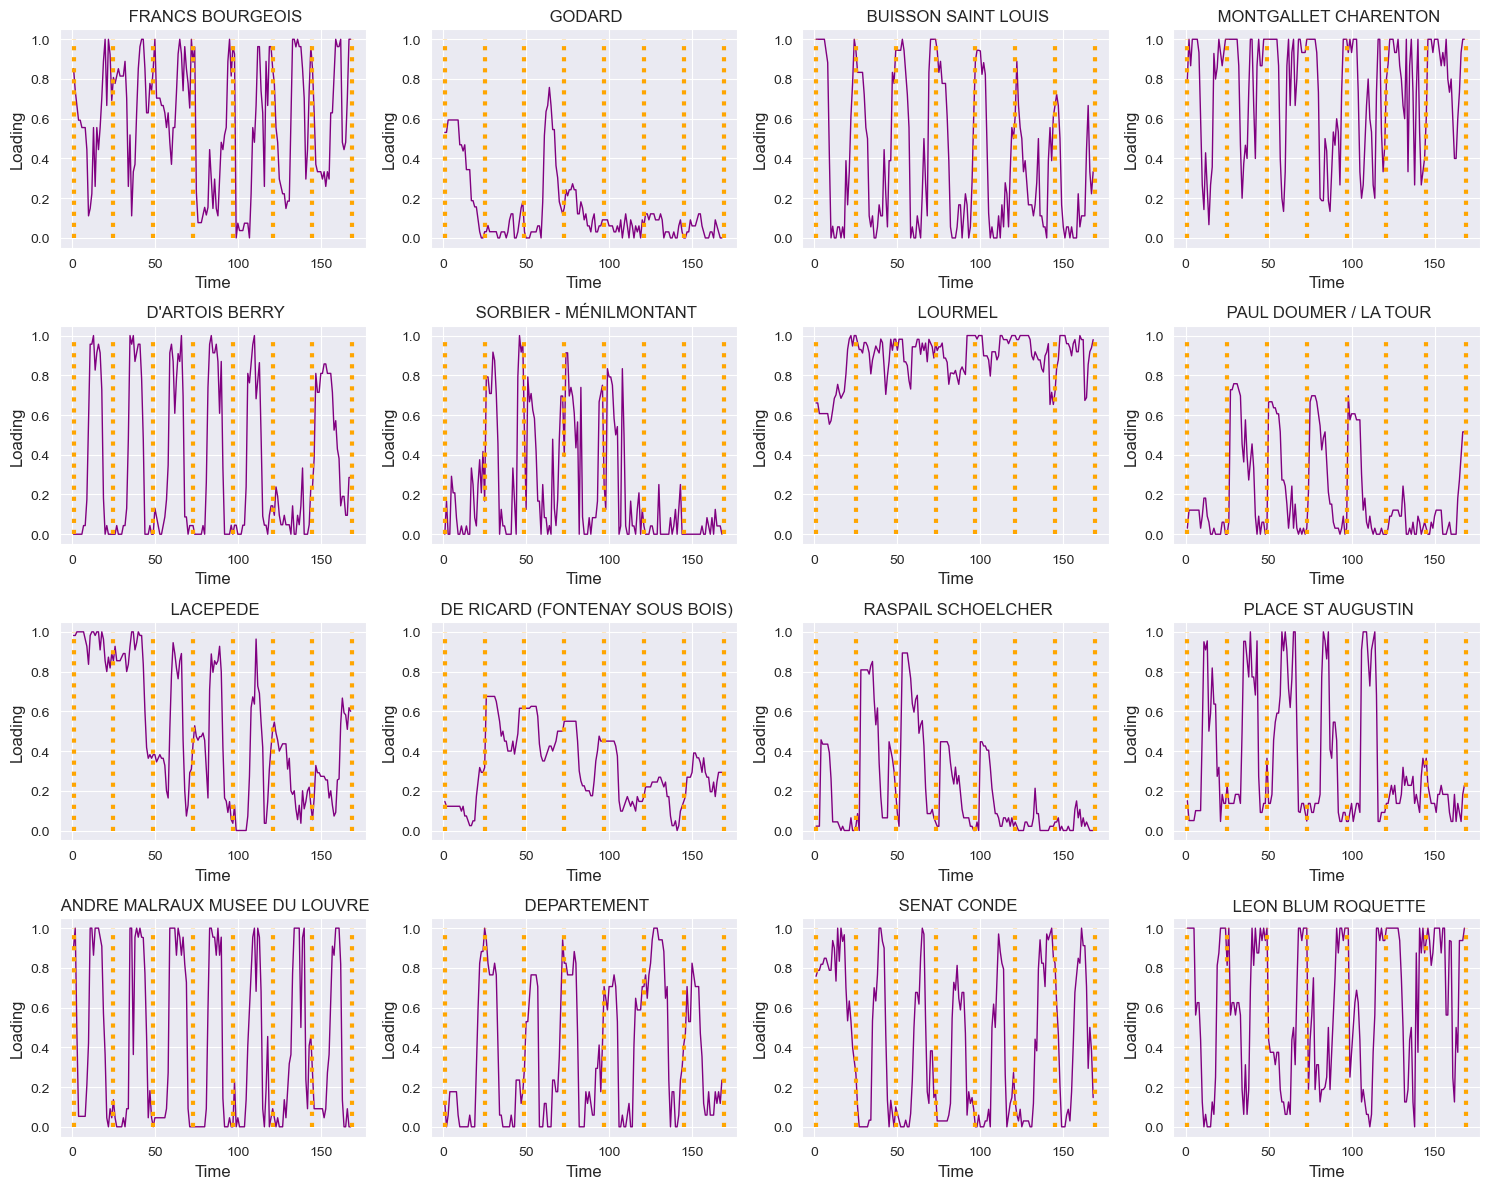

In [10]:
stations = np.arange(loading.shape[0])
rd.shuffle(stations)
stations = stations[:16] 

# --- #
n_steps    = loading.shape[1] 
fig, axs = plt.subplots(4, 4, figsize = (15,12))
time_range = np.linspace(1, n_steps, n_steps) 


timeTick = np.arange(1, 25*7, 24)

for i in range(4):
    for j in range(4):
        k_station = stations[4 * i + j]
        axs[i, j].plot(time_range, loading.iloc[k_station, :], linewidth = 1, color = 'purple')
        axs[i, j].vlines(x = timeTick, ymin = 0, ymax = 1, colors = "orange", linestyle = "dotted", linewidth = 3)
        axs[i, j].set_title(coord.names[1 + k_station], fontsize = 12)

for ax in axs.flat:
    ax.set_xlabel('Time', fontsize = 12)
    ax.set_ylabel('Loading', fontsize = 12)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()
plt.show()

Dans un contexte un peu plus général, on affiche la moyenne de chargement totale sur toutes les stations au cours de la semaine.

In [11]:
print(loading.mean().mean())

0.3816217759807477


Ainsi, on peut dire qu'en moyenne, sur l'ensemble des stations parisiennes et sur une semaine, le taux de chargement moyen est de 0.39. Ce qui signifie qu'en moyenne il y a 4 vélos sur 10 disponibles dans les stations. 

On s'intéresse ici au chargement moyen de toutes les stations en fonction de l'heure (chaque courbe correspond à un jour) et en noire la moyenne sur les jours de ce chargement.

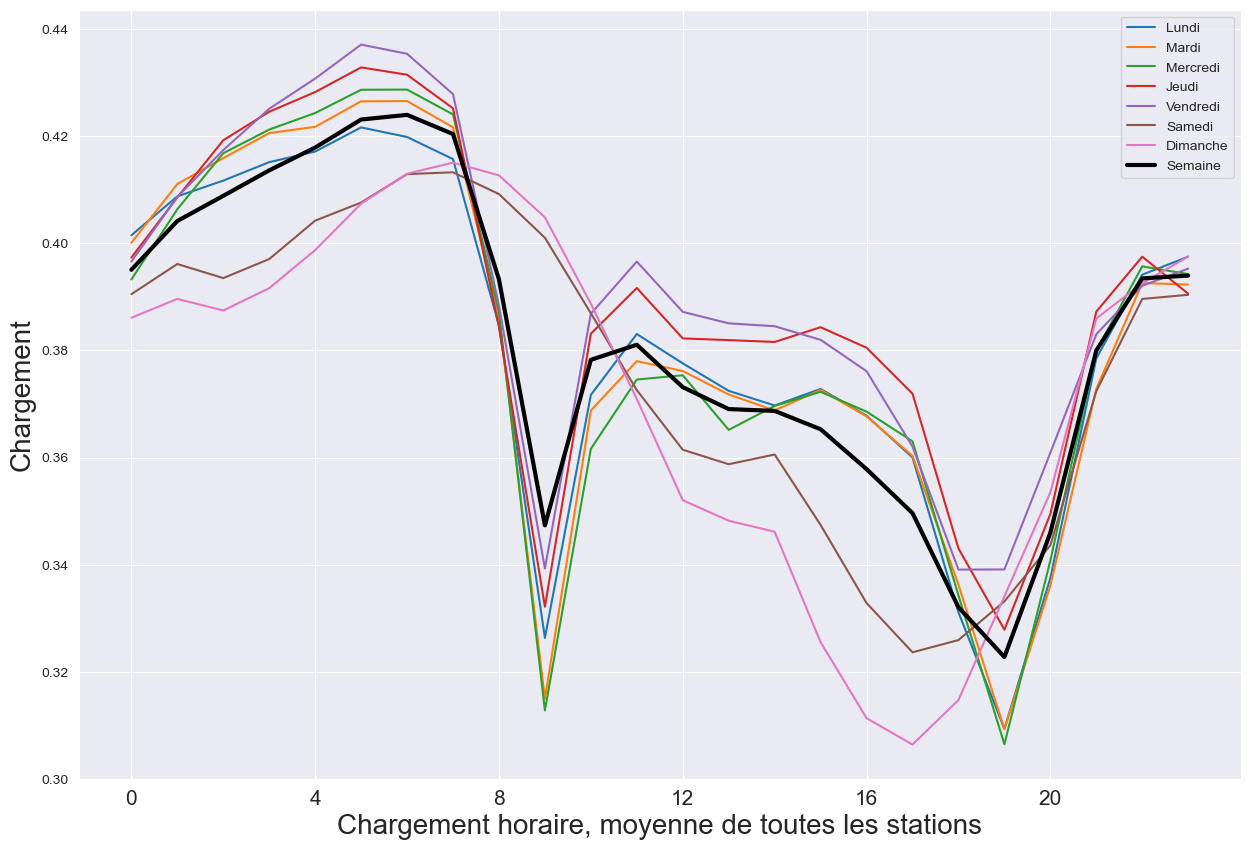

In [12]:
# On calcule la moyenne pour chaque jour de la semaine
mean_per_hour_per_day = loading.mean(axis = 0).to_numpy()
mean_per_hour_per_day = mean_per_hour_per_day.reshape((7, 24))

mean_per_hour = mean_per_hour_per_day.mean(axis=0)

# --- #

days = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]
plt.figure(figsize = (15,10))

plt.plot(mean_per_hour_per_day.transpose())
plt.plot(mean_per_hour, color = "black", linewidth = 3)

plt.xlabel('Chargement horaire, moyenne de toutes les stations', fontsize = 20)
plt.ylabel('Chargement', fontsize = 20)
plt.legend(days + ['Semaine'])
plt.xticks(ticks = np.arange(0,24,4), labels=np.arange(0,24,4), fontsize = 15)

plt.tight_layout
plt.show()


Ainsi, on peut voir qu'en moyenne, alentours de 2h-4h du matin les vélos ne sont pas beaucoup empruntés. Cependant, on peut voir qu'à 9h environ ils le sont davantage, idem entre 19h et 20h. Ce résultat s'explique par les heures de travail de la population qui part le matin en vélo et rentre en fin de journée. 

On souhaite savoir, en moyenne, quel est le jour de la semaine, durant lequel les gens utilisent le plus les vélos, on fait alors une moyenne sur tous les jours de la semaine pour chaque heure de la journée.

Regardons maintenant le comportement moyen des taux de chargements des stations à 18h pour chaque jour de la semaine. 

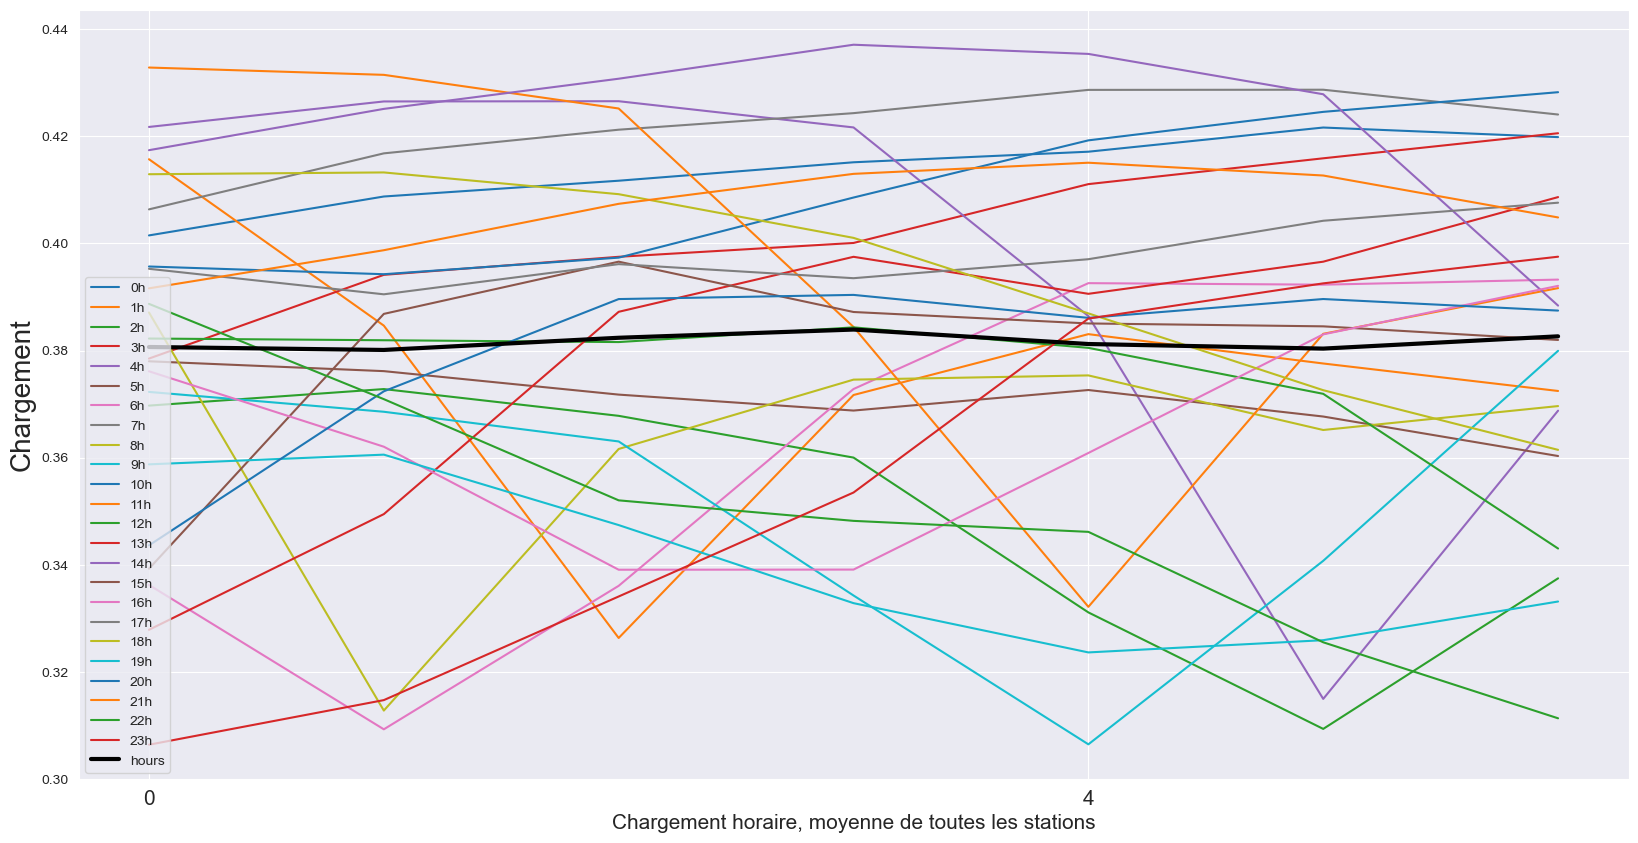

In [13]:
# On calcule la moyenne pour chaque heure sur tous les jours de la semaine
mean_per_hour_per_day = loading.mean(axis = 0).to_numpy()
mean_per_hour_per_day = mean_per_hour_per_day.reshape((24, 7))

mean_per_hour = mean_per_hour_per_day.mean(axis=0)

# --- #
hours = ["0h", "1h", "2h","3h", "4h", "5h", "6h", "7h", "8h", "9h", "10h", "11h", "12h", "13h", "14h", "15h", "16h", "17h", "18h", "19h", "20h", "21h", "22h", "23h"]
plt.figure(figsize = (20,10))

plt.plot(mean_per_hour_per_day.transpose())
plt.plot(mean_per_hour, color = "black", linewidth = 3)

plt.xlabel('Chargement horaire, moyenne de toutes les stations', fontsize = 15)
plt.ylabel('Chargement', fontsize = 20)
plt.legend(hours + ['hours'])
plt.xticks(ticks = np.arange(0,7,4), labels=np.arange(0,7,4), fontsize = 15)
  
plt.tight_layout
plt.show()

On affiche le chargement moyen de toutes les stations en fonction du jour (chaque courbe correspond à une heure) et en noire la moyenne sur les heures. 

On peut voir que le chargement moyen est quasiment constant chaque jour, même le week-end, contrairement au graphe précédent où le chargement variait légèrement.

On peut donc déjà supposer que l'heure a une plus forte influence sur le profil de chargement que le jour. 


On va maintenant regarder l'évolution du taux sur une station au hasard :

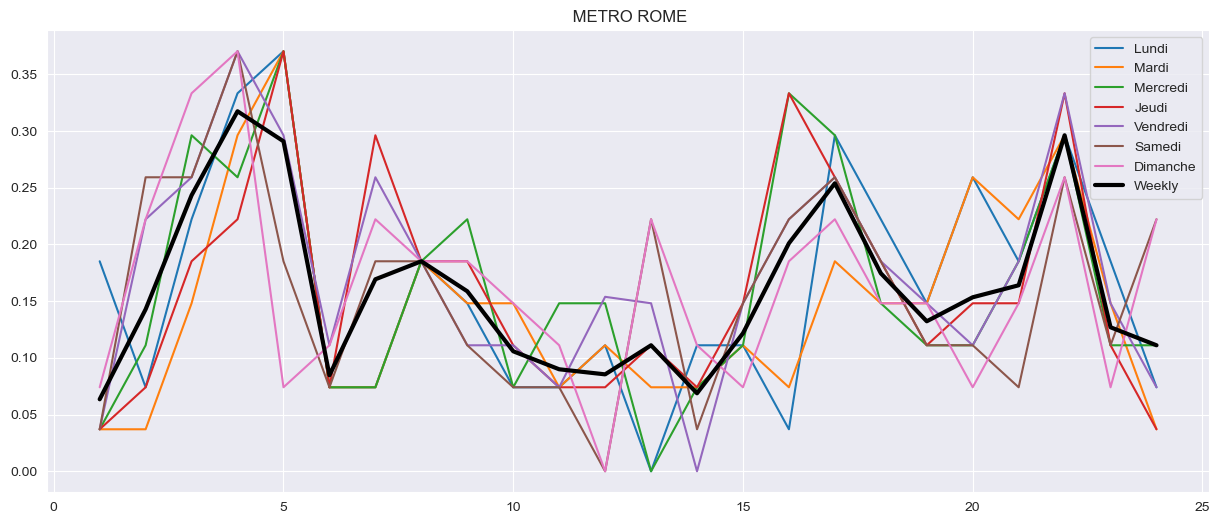

In [29]:
plt.rcParams['figure.figsize'] = [15, 6]
time_range = np.arange(1, 25)

# on sélectionne aléatoirement un numéro d'un indice de ligne
i = np.random.randint(1, 1190) 

df = loading.iloc[i]

# Création d'une matrice de 24 lignes (une pour chaque heure)
mean_per_hour_per_day = np.array(df).reshape(24, -1)

# on calcul de la moyenne par heure
mean_per_hour = np.mean(mean_per_hour_per_day, axis=1)

# Conversion de la matrice en dataframe
mean_per_hour_per_day = pd.DataFrame(mean_per_hour_per_day)

# Renommage des colonnes avec les jours de la semaine
mean_per_hour_per_day.columns = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]

mean_per_hour_per_day['time_range'] = np.arange(1, 25)
mean_per_hour_per_day = pd.melt(mean_per_hour_per_day, id_vars='time_range', var_name='Days')
mean_per_hour = pd.DataFrame(mean_per_hour)

mean_per_hour.columns = ["Weekly"]

mean_per_hour['time_range'] = np.arange(1, 25)


for day in mean_per_hour_per_day['Days'].unique():
    plt.plot(mean_per_hour_per_day[mean_per_hour_per_day['Days'] == day]['time_range'], 
             mean_per_hour_per_day[mean_per_hour_per_day['Days'] == day]['value'], 
             label=day)

plt.plot(mean_per_hour['time_range'], mean_per_hour['Weekly'], color='black', linewidth=3, label='Weekly')

plt.title(coord.names[i])
plt.legend()
plt.show()


Regardons maintenant, quelle station est la plus fréquentée, en moyenne par semaine.

In [ ]:
mean=loading.mean(axis=1)
i = mean.idxmin()
print('Average fill rate :',mean[i])
print(coord.loc[i])

Et de même la station la moins fréquentée, en moyenne par semaine.

In [ ]:
mean=loading.mean(axis=1)
i = mean.idxmax()
print('Average fill rate :',mean[i])
print(coord.loc[i])

Regardons maintenant le comportement moyen des taux de chargements des stations à 18h pour chaque jour de la semaine. 

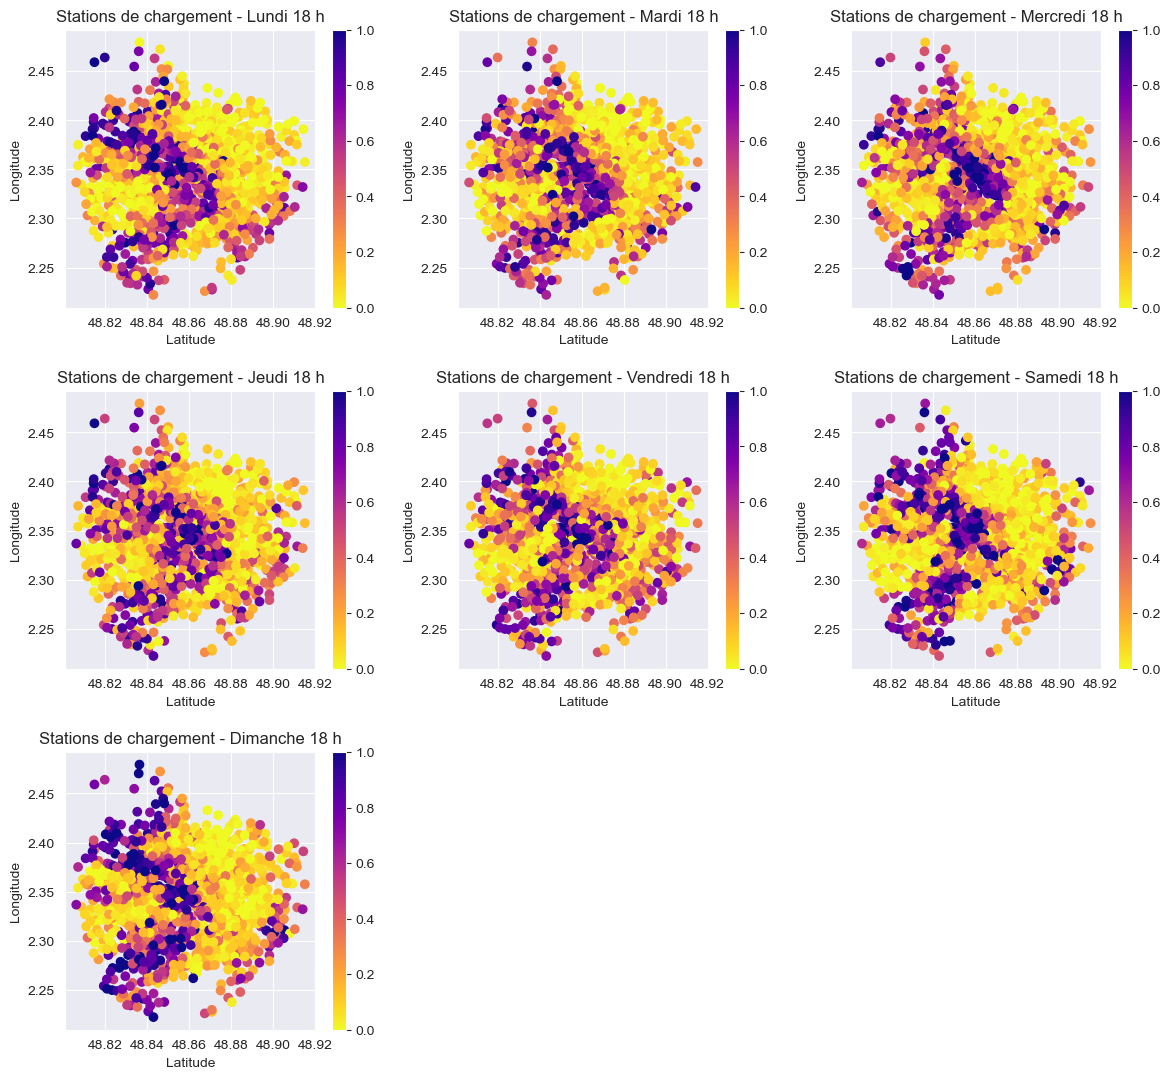

In [32]:
#on affiche le comportement des chargements des stations à 18h chaque jour
loading_data = loading.to_numpy()

h = 18
hours = np.arange(h, 168, 24)

load_per_hour = loading_data[:, hours]

days = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]

# --- #

s, m = 10, 3
k = 1 + len(days)//m

fig = plt.figure(figsize=(s+1, s))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=.3, wspace=.25)

for (i,d) in enumerate(days):
    ax = fig.add_subplot(k, m, i+1)
    im = ax.scatter(coord.latitude, coord.longitude, c = load_per_hour[:,i], cmap = cm.plasma_r)
    plt.colorbar(im)
    
    ax.set_title('Stations de chargement - ' + d + ' {} h'.format(h))
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')

#plt.tight_layout()
plt.show()

ANALYSE :
Ces graphes nous permettent de voir que les zones des stations chargées varient fortement au cours de la journée. 

On peut supposer un déplacement des vélos vers le centre ville et les bords de Seine le matin entre 8h et 12h (qui pourraient correspondre aux zones de travail) car les stations sont en moyenne plus chargées, et elles semblent se vider entre 16h et 20h, pour se reremplir vers le Sud-Ouest et Sud-Est de Paris, qui pourraient correspondre aux zones d'habitations.

On regarde le comportement moyen par heure (toutes les 4h) sur l'ensemble des stations.


In [1]:
#on affiche le comportement moyen par heure (toutes les 4h)

hours = [1, 5, 9, 13, 17, 21, 24]

# Taille de la figure et nombre de sous-graphiques
s = 10
n = len(hours)
num_rows = 2
num_cols = (n + num_rows - 1) // num_rows
fig, axs = plt.subplots(num_rows, num_cols, figsize=(s * num_cols, s * num_rows))

for i, h in enumerate(hours):
    load_per_hour = np.mean(loading.iloc[:, h::24], axis=1)  # Calcul de la moyenne pour chaque heure sur tous les jours de la semaine
    row = i // num_cols
    col = i % num_cols
    im = axs[row, col].scatter(coord.latitude, coord.longitude, c=load_per_hour, cmap=cm.plasma_r)
    axs[row, col].set_title('Chargement à {} h'.format(h), fontsize=25)
    plt.colorbar(im, ax=axs[row, col])

for ax in axs.flat:
    ax.set_xlabel('Latitude', fontsize=20)
    ax.set_ylabel('Longitude', fontsize=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()




NameError: name 'plt' is not defined

ANALYSE :
En comparant le chargement moyen par jour et non plus par heures, on voit que celui-ci semble beaucoup moins varier. L'influence du jour semble moindre.

On fait ici la même chose que précédemment mais on projette les stations sur la carte de Paris, pour avoir une idée plus visuelle de leur localisation.

In [ ]:

Position = np.array(coord)[:,0:2]

#graphe à 1h
a1 = np.arange(1,168,24, dtype=int)
data1h = np.mean(np.array(loading)[:,a1],axis=1)

fig1 = px.scatter_mapbox(data1h, Position[:,1], Position[:,0], color=data1h, color_continuous_scale = px.colors.sequential.Plasma_r, 
                        size_max=15, zoom=10,mapbox_style="carto-positron", opacity = .9,
                        title = 'Chargement à 1h')
fig1.show()

a5 = np.arange(5,168,24, dtype=int)
data5h = np.mean(np.array(loading)[:,a5],axis=1)

fig5 = px.scatter_mapbox(data5h, Position[:,1], Position[:,0], color=data5h, color_continuous_scale = px.colors.sequential.Plasma_r, 
                        size_max=15, zoom=10,mapbox_style="carto-positron", opacity = .9,
                        title = 'Chargement à 5h')
fig5.show()

a9 = np.arange(9,168,24, dtype=int)
data9h = np.mean(np.array(loading)[:,a9],axis=1)

fig9 = px.scatter_mapbox(data9h, Position[:,1], Position[:,0], color=data9h, color_continuous_scale = px.colors.sequential.Plasma_r, 
                        size_max=15, zoom=10, mapbox_style="carto-positron", opacity = .9,
                        title = 'Chargement à 9h')
fig9.show()

a13 =np.arange(13,168,24, dtype=int)
data13h = np.mean(np.array(loading)[:,a13],axis=1)

fig13 = px.scatter_mapbox(data13h, Position[:,1], Position[:,0], color=data13h, color_continuous_scale=px.colors.sequential.Plasma_r, 
                          size_max=15, zoom=10,mapbox_style="carto-positron", 
                         title = 'Chargement à 13h')
fig13.show()

a17 =np.arange(17,168,24, dtype=int)
data17h = np.mean(np.array(loading)[:,a17],axis=1)

fig17 = px.scatter_mapbox(data17h, Position[:,1], Position[:,0], color=data17h, color_continuous_scale=px.colors.sequential.Plasma_r, 
                          size_max=15, zoom=10,mapbox_style="carto-positron",
                         title = 'Chargement à 17h')
fig17.show()


a21 =np.arange(21,168,24, dtype=int)
data21h = np.mean(np.array(loading)[:,a21],axis=1)

fig21= px.scatter_mapbox(data21h, Position[:,1], Position[:,0], color=data21h, color_continuous_scale=px.colors.sequential.Plasma_r, 
                          size_max=15, zoom=10,mapbox_style="carto-positron",
                        title = 'Chargement à 21h')
fig21.show()



a24 =np.arange(24,168,24, dtype=int)
data24h = np.mean(np.array(loading)[:,a24],axis=1)

fig24 = px.scatter_mapbox(data24h, Position[:,1], Position[:,0], color=data24h, color_continuous_scale=px.colors.sequential.Plasma_r, 
                          size_max=15, zoom=10,mapbox_style="carto-positron",
                         title = 'Chargement à 24h')
fig24.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import colors
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from statsmodels.graphics.mosaicplot import mosaic
from scipy.spatial.distance import cdist

## 3. Etude sur le jeu de données complet 

### 3.1. ACP

Notre étude porte sur un grand jeu de données, nous voudrions trouver un moyen de réduire la dimension de notre jeu de données. Pour ce faire, nous décidons de faire une ACP sur notre jeu de donneés afin de réduire un maximum les dimensions.

Pour cela, nous commençons par afficher les boxplots des variables quantitatives sur la même échelle, pour voir s'il est intéressant de standardiser nos données. En effet, si nos données ne sont pas exprimer dans la même échelle cela peut influencer l'importance qu'a une variable sur notre ACP. Ici toutes les données sont comprises entre 0 et 1. Il n'est donc pas nécessaire de standardiser les données. 

In [ ]:
#Affichage en boxplot des variables qualitatives sur la meme échelle
plt.figure(figsize=(5,5))
loading.boxplot()
plt.title('Boxplot')
plt.xticks(rotation=-90)
plt.xlabel('Colonne')
plt.ylabel('Valeurs')
plt.show()


In [ ]:
pca = PCA()
loading_pca = pca.fit_transform(loading)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Variance cumulée expliquée en fonction de la dimension de l espace de l`ACP')
plt.xlabel('Nombre de composantes dans l ACP')
plt.ylabel('Variance cumulée expliquée')

#On regarde le nombre de composantes exacts qu'il nous faut garder afin d'avoir un pourcentage expliqué égal à 80%
pca = PCA(0.80).fit(loading) #pour savoir directement le nombre de composants nécessaire pour représenter une explication de 85% de la variance


# Affichage du nombre de composantes qu'on garde pour la ACP
pca.n_components_ 
print(f"on garde {pca.n_components_} composants pour le PCA")

La fonction nous dit qu'il faut garder 7 composantes pour expliquer 80% de la variance, cependant cela semble beaucoup , en effet quand on regarde l'histogramme ci-dessous des pourcentage de représentation de chaque composante, on voit qu'après la 5ème composante celles-ci n'explique que très peu la variance.

In [ ]:
pca = PCA(n_components=7)

loading_pca = pca.fit_transform(loading) 

print(100*pca.explained_variance_ratio_)

print('--- PCA ---')
print('Dimension initiale :' , loading.shape)
print('Dimension après projection:', loading_pca.shape)

print('')

print('--- Variance expliquée  ---')
print('Composante 1:', round(pca.explained_variance_[0],2), 'i.e.', round(100*pca.explained_variance_ratio_[0],2), '% de la variance totale')
print('Composante 2:', round(pca.explained_variance_[1],2), 'i.e.', round(100*pca.explained_variance_ratio_[1],2), '% de la variance totale')
print('Composante 3:', round(pca.explained_variance_[2],2), 'i.e.', round(100*pca.explained_variance_ratio_[2],2), '% de la variance totale')


On affiche l'histogramme de ce que chaque variable explique dans le modèle

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))], y=pca.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par Chaque Composante Principale")
plt.ylim(0, 40)  # limiter l'axe y à la plage spécifiée
plt.show()

D'où notre choix de garder seulement 5 composantes.

In [ ]:
pca = PCA(n_components=5)
loading_pca = pca.fit_transform(loading) 

Voici l'histogramme et les boxplots représentant le pourcentage de variance expliquée par chaque composante principale:

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))], y=pca.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par chaque composante principale")
plt.ylim(0, 40)  
plt.show()

Représentation de la PCA : projection des données sur les axes des deux composantes principales :

In [ ]:
box = plt.boxplot(loading_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots des 5 premières composantes")
plt.tight_layout()
plt.show()

Une fois notre ACP réalisée, on projette nos données dans l'espace d'ACP. 

Voici les graphes de projections des données sur les axes des deux composantes principales de l'ACP, qui expliquent le plus de variance.

In [ ]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)

arrow_length_factor = 3
# Facteur de longueur des flèches

for i, j, nom in zip(coord1, coord2, loading.columns):
    plt.text(i*arrow_length_factor, j*arrow_length_factor, nom, fontsize=10)
    plt.arrow(0, 0, i* arrow_length_factor, j* arrow_length_factor, color = 'purple', alpha=0.7, width = 0.001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Carte de projection - PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')

plt.grid(True)
plt.show()



ANALYSE :
Les projections dans les espaces d'ACP peuvent nous amener à faire les hypothèses suivantes : 
- la composante 1 semble correspondre au chargement moyen des stations. 
- Il est compliqué de trouver une interprétation à la composante 2 car la grande quantité de données nous ne permet pas d'avoir un rendu visuel. 

### 3.2. Méthode de clustering avec k-means


In [ ]:
# fonction pour afficher les nuages de points des clusters K-means

In [ ]:
def plotKmeans(kmeans, data, n_clusters):

    kmeans.fit(data)

    clusters_kmeans = kmeans.predict(data)

    ax = plt.gca()

    ax.axis('equal')

    cmap = plt.get_cmap('Set3', n_clusters)

    # plot the input data (rajouter .iloc pour les kmeans non pca)
    ax.scatter(data[:, 0], data[:, 1], c=clusters_kmeans, s=1, linewidths=1, cmap=cmap)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radius = [cdist(data[clusters_kmeans == i], [center]).max() for i, center in enumerate(centers)]
    for i in range(n_clusters):
        ax.add_patch(plt.Circle(centers[i], radius[i], fc=cmap.colors[i], alpha=0.3))

In [ ]:
# fonction pour reclasser les clusters dans mat de confusions

In [ ]:
def matchClasses(classif1, classif2):
    cm = confusion_matrix(classif1, classif2)
    K = cm.shape[0]
    a, b = np.zeros(K), np.zeros(K)
    for j in range(K):
        for i in range(K):
            if (a[j] < cm[i,j]):
                a[j] = cm[i,j]
                b[j] = i 
    a = a.astype(int)
    b = b.astype(int)
                                             
    print ("")
    print ("Classes size:", a)
    print ("Class (in the classif1 numbering):", b)
    print ("")
    
    table = cm.copy()
    for i in range(K):
        table[:,b[i]] = cm[:,i]   
        
    clusters = classif2.copy()
    n = classif2.shape[0]
    for i in range(n):
        for j in range(K):
            if (classif2[i] == j):
                clusters[i] = b[j]
        
    return table, clusters

In [ ]:
# Etude sur loading

We will now try to find the optimal number of clusters

In [ ]:
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='random', n_init='auto', max_iter=100, random_state=42)
    kmeans.fit(loading)
    inertia.append(kmeans.inertia_)
inertia = np.array(inertia)


plt.scatter(range(2, 15), inertia[1:])
plt.xlabel('nombre de clusters', fontsize = 15)
plt.ylabel('inertie', fontsize = 15)
plt.title("Graphe du coude", fontsize = 15)
plt.show()


# --- #


# Using yellowbrick

kmeans = KMeans(init='random', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,12))

visualizer.fit(loading)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

Pour analyser ces graphes, on cherche le coude c'est à dire le moment où lorsqu'on va rajouter une composante il y aura la plus grande baisse d'inertie. Dans le premier graphe, on peut observer une différence de tendance entre 7-9. Pour le deuxième graphe, le coude est à 9.  

Nous allons maintenant utiliser la méthode "silhouette score" pour déterminer le nombre de cluster

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, init='random', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2) 
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(loading)

Pour choisir le nombre de clusters le plus adapté il faut trouver un équilibre entre plusieurs aspects. Tout d'abord, il faut que chaque pic dépassent le trait rouge, alors, les données sont adaptées au nombre de classes. Aussi, il faudrait dans l'idéal que chaque pic ait la même épaisseur. Enfin, il faut qu'il y ait le moins de valeurs négatives possibles, elles correspondent au nombre de variables mal classées.
Dans notre cas, il n'y a pas vraiment de situation idéale. Avec 2,3 ou 4 clusters le graphiques est plutôt bien mais il faudrait peut etre plus de clusters pour analyser le grand nombre de données que nous avons. Si on part sur 9 clusters (comme pour le graphe Elbow), le silhoutte score n'est pas parfait mais il est un bon compromis entre les aspects énoncés précedemment.

Ci-dessous on observe l'histogramme des classifications formées avec le nombre de clusters qui nous avons choisi (ici 9). 

In [ ]:
K = 3

kmeans = KMeans(n_clusters=K, init='random', n_init='auto', random_state=0)
clusters = kmeans.fit_predict(loading)

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

On constate que les variables sont réparties de manière assez hétérogène. Beaucoup de variables se trouvent dans le cluster 7 et au contraire dans le cluster 0 il n'y en a pas beaucoup. Cependant, le nombre de variables est supérieur à 50 donc la répartition est raisonnable.


In [ ]:
plotKmeans(kmeans, loading ,3)

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

# Créer une table croisée des données bonus et des clusters
tbl1 = pd.crosstab( coord['bonus'], clusters)

# Afficher la table croisée
print(tbl1)

props = lambda key: {'color': 'grey' if '0' in key else 'blue' if '1' in key else 'pink' }

# Réaliser un diagramme en mosaïque
plt.figure(figsize=(8, 6))
mosaic(tbl1.stack(), title="Stations en altitude en fonction des clusters",properties=props)
plt.show()


In [ ]:
loading_sub1 = loading.iloc[:,:]
loading_sub1['cluster']=clusters
mean_loading1=loading_sub1.groupby('cluster').mean()
mean_loading1.head()

fig, ax = plt.subplots(figsize=(10, 6))

# Affichage des 4 lignes sur le même graphique
for i in range(3):
    ax.plot(mean_loading1.columns, mean_loading1.iloc[i], label=f'Cluster {i}')

plt.legend()
plt.title('Moyenne des chargements par cluster')
plt.xlabel('Temps en heures')
plt.ylabel('Moyenne des loading')
plt.show()


In [ ]:
# Etude sur loading_pca

In [ ]:
inertia = []
for k in range(1, 15):
    kmeans_pca = KMeans(n_clusters=k, init='random', n_init='auto', max_iter=100, random_state=42)
    kmeans_pca.fit(loading_pca)
    inertia.append(kmeans_pca.inertia_)
inertia = np.array(inertia)


plt.scatter(range(2, 15), inertia[1:])
plt.xlabel('nombre de clusters', fontsize = 15)
plt.ylabel('inertie', fontsize = 15)
plt.title("Graphe du coude", fontsize = 15)
plt.show()


# --- #


# Using yellowbrick

kmeans_pca = KMeans(init='random', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans_pca, k=(1,12))

visualizer.fit(loading_pca)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

D'après la méthode du coude on peut dire que le nombre de clusters le plus adapté avec K-means estt de 7

Nous allons utiliser la méthode "silouhette score" pour valider le résultat précedent

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for k in range(2, 6):
    kmeans_pca = KMeans(n_clusters=k, init='random', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2) 
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans_pca, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(loading_pca)

Si on choisit un nombre de clusters égal à 3, voici l'histogramme des données associé

In [ ]:
K = 3

kmeans_pca = KMeans(n_clusters=K, init='random', n_init='auto', random_state=0)
clusters_pca = kmeans_pca.fit_predict(loading_pca)

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

In [ ]:
plotKmeans(kmeans_pca, loading_pca,3)

In [ ]:
# Créer une table croisée des données bonus et des clusters

tbl2 = pd.crosstab( coord['bonus'], clusters_pca)
print(tbl2)

props = lambda key: {'color': 'grey' if '0' in key else 'blue' if '1' in key else 'pink' }

# Réaliser un diagramme en mosaïque
plt.figure(figsize=(8, 6))
mosaic(tbl2.stack(), title="Stations en altitude en fonction des clusters",properties=props)
plt.show()


In [ ]:
loading_sub2 = loading.iloc[:,:]
loading_sub2['cluster']=clusters_pca_sorted
mean_loading2=loading_sub2.groupby('cluster').mean()
mean_loading2.head()

fig, ax = plt.subplots(figsize=(10, 6))

# Affichage des 3 lignes sur le même graphique
for i in range(3):
    ax.plot(mean_loading2.columns, mean_loading2.iloc[i], label=f'Cluster {i}')

plt.legend()
plt.title('Moyenne des chargements par cluster')
plt.xlabel('Temps en heures')
plt.ylabel('Moyenne des loading')
plt.show()


Comparaison des deux classifications :

In [ ]:
# visualisation des clusters grace à scatterplot

In [ ]:
#reclassement des clusters pour matcher les couleurs
cm1, clusters_pca_sorted = matchClasses(clusters, clusters_pca)

points_diff = clusters != clusters_pca

fig, axs = plt.subplots(1, 3, figsize = (15, 5))


#graphe 1 : données complètes
im1 = axs[0].scatter(coord.latitude, coord.longitude, c = clusters, cmap = 'viridis', s=20, label=f'Cluster {i}')
axs[0].set_title('Données complètes', fontsize = 10)

#graphe 2 : données réduites au pca
im2 = axs[1].scatter(coord.latitude, coord.longitude, c = clusters_pca, cmap = 'viridis', s=20)
axs[1].set_title('Données réduites au pca', fontsize = 10)


#graphe 3 : superposition des résultats avec affichage en noir des points différents
im3 = axs[2].scatter(coord.latitude, coord.longitude, c=clusters, cmap='viridis', s=20, label='Données réduites au PCA')
axs[2].set_title('Superposition', fontsize=10)

# Superposition des points différents en noir sur le deuxième scatterplot
axs[2].scatter(coord.latitude[points_diff], coord.longitude[points_diff], color='black', s=20, alpha=0.4, label='Différences')

# Calcul du nombre de points différents
num_diff_points = np.sum(points_diff)

# Calcul du pourcentage de réussite
pourcentage_reussite = (1- num_diff_points / len(clusters)) * 100

# Affichage du résultat
print(f"Nombre de points différents : {num_diff_points} sur {len(clusters)}")
print(f"Pourcentage de réussite : {pourcentage_reussite:.2f}%")



In [ ]:
ConfusionMatrixDisplay(confusion_matrix(clusters, clusters_pca)).plot()
plt.xlabel('On the reduced data (PCA)')
plt.ylabel('On the complete data')
plt.show()

In [ ]:
#on convertit la table de confusion en dataframe 
df_cm =pd.DataFrame(cm1, columns=['groupe0', 'groupe1', 'groupe2'], index=['groupe_pca0', 'groupe_pca1', 'groupe_pca2'])
df_cm.head()

En affichant la table de contingence, on voit que le nombre de stations mal classifié est très faible, cela nous permet de conclure (directement et non en passant par une CA) que nos méthodes de classification sont comparables.

On décide désormais d'étudier s'il existe un lien entre la classification opérée sur loading_pca par Kmeans et les stations localisées sur une colline.

Pour ce faire, on réalise une Analyse en Correspondance. On commence par calculer la matrice de confusion :

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(clusters_pca, coord['bonus'])
print(cm[:,0:2])
cm1 = cm[:,0:2]
ConfusionMatrixDisplay(cm).plot()
plt.xlabel('Groupes Hill 0 et 1')
plt.ylabel('Clusters_pca issus de Kmeans')
plt.show()


In [ ]:

#on convertit la table de confusion en dataframe 
df_cm = pd.DataFrame(cm1 , columns=['Pas colline', 'Colline'], index=['groupe_pca0', 'groupe_pca1', 'groupe_pca2'])
df_cm.head()

In [ ]:
from prince import CA

In [ ]:

ca = prince.CA(
     n_components=14,
     n_iter=10,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=42)

ca = ca.fit(df_cm)


In [ ]:
display(ca.eigenvalues_summary)

ca.scree_plot()

In [ ]:
hill_coord = ca.column_coordinates(df_cm)
gpe_coord = ca.row_coordinates(df_cm)

display(hill_coord)
display(gpe_coord)

In [ ]:


plt.scatter(hill_coord, [0, 0], color='blue', label='Hill')
plt.scatter(gpe_coord, [0, 0, 0], color='green', label='Clusters')

plt.legend()
# Afficher le graphique
plt.show()

#Analyse :
#on a globalement compris qu'on était pas sur une colline sur les clusters 0 et 2
#Cependant on a pas du tout compris quand la station se situe sur une colline 
#Résultat non satisfaisant 

In [ ]:
ca.column_cosine_similarities(df_cm)

#très bonne représentation des variables colline - pas colline

In [ ]:
#très bonne représentation des différents groupes de clusters formés sur les données pca
ca.row_cosine_similarities(df_cm)

In [ ]:
def plot_ca(ax1=0, ax2=1, mca=mca, data=titanic_quali):
    dataset = mca.transform(data)
    dataset.reset_index(inplace=True)
    sns.scatterplot(data = dataset, x = ax1, y = ax2, hue = 'survived', alpha=1)
    plt.grid(True)
    plt.show()

### 3.3. CAH : Agglomerative Clustering


Etudions ici la méthode de la classification ascendante hiérarchique (CAH). Cette méthode consiste à afficher des dendrogrammes des données en fonction de différents likages.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

La méthode CAH étant très coûteuse en termes de calculs, on préférera faire l'analyse en prenant un échantillon plus petit. Nous avons vu que l'analyse des données réduites par AP donnait de bons résultats. Ainsi, nous prendrons les données réduites par la suite pour faciliter les calculs.

In [ ]:
print(loading.shape)
print("taille loading_pca : " +str(loading_pca.shape))

On voit bien que la taille des données après l'ACP est bien réduite

On détermine le nombre de clusters adéquats grâce aux critères graphiques, notamment le "graphe du coude".

In [ ]:
ac = AgglomerativeClustering(linkage="ward", compute_distances=True)
clusterscah1= ac.fit_predict(loading_pca)

distances = ac.distances_

n_sizes = 15
x = np.arange(n_sizes, 0, -1)
y = ac.distances_[-n_sizes:]

plt.scatter(x, y)

plt.xlabel('Point indices')
plt.ylabel('Distances')
plt.title("Choice of the number of classes")
plt.show()

### avec yellowbrick ###
ac = AgglomerativeClustering(linkage='ward', compute_distances=True)
visualizer = KElbowVisualizer(ac, k=(1,12))

visualizer.fit(loading_pca)  # Fit the data to the visualizer
visualizer.show()   
plt.show()

D'après les résultats précedents, il faut prendre 3 clusters différents.  On affiche alors le dendrogramme associé en utilisant les linkages "Ward".

In [ ]:
#Nombre de clusters choisi par les indicateurs 
K = 3

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusterscah1 = ac.fit(loading_pca)

children = ac.children_
distances = ac.distances_
n_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.c_[children, distances, n_observations]

sch.dendrogram(linkage_matrix, labels=ac.labels_)

# Cutting the dendrogram to get K classes
max_d = .5*(ac.distances_[-K]+ac.distances_[-K+1])
plt.axhline(y=max_d, c='k')

plt.title("Dendrogram with Ward linkage")
plt.show()

On affiche tous les types de linkages que l'on a étudié pour montrer que "Ward" et "complete" sont les deux types dont les graphes sont faciles à explorer:

In [ ]:
plt.subplot(2,2,1)
linkage_matrix_single = sch.linkage(loading_pca, method='single')
sch.dendrogram(linkage_matrix_single)
plt.title("Dendrogram with single linkage")

plt.subplot(2,2,2)
linkage_matrix_complete = sch.linkage(loading_pca, method='complete')
sch.dendrogram(linkage_matrix_complete)
plt.title("Dendrogram with complete linkage")

plt.subplot(2,2,3)
linkage_matrix_average = sch.linkage(loading_pca, method='average')
sch.dendrogram(linkage_matrix_average)
plt.title("Dendrogram with average linkage")

plt.subplot(2,2,4)
linkage_matrix_ward = sch.linkage(loading_pca, method='ward')
sch.dendrogram(linkage_matrix_ward)
plt.title("Dendrogram with Ward linkage")

plt.tight_layout()
plt.show()

In [ ]:
tbl_c1 = pd.crosstab( coord['bonus'], clusterscah1)

# Afficher la table croisée
print(tbl_c1)

props = lambda key: {'color': 'grey' if '0' in key else 'blue' if '1' in key else 'pink' }

# Réaliser un diagramme en mosaïque
plt.figure(figsize=(8, 6))
mosaic(tbl_c1.stack(), title="Stations en altitude en fonction des clusters",properties=props)
plt.show()


### 3.4. Gaussian Mixture Models

On affiche d'abord la dispersion des points par cluster initiée par le modèle de mélange gaussien (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score 

In [ ]:
K = 3
cmap = plt.get_cmap('Set3', K)

gmm = GaussianMixture(n_components=K, n_init=3)
clusters_gmm_loading = gmm.fit_predict(loading)

# --- #

# on a montré que l'on pouvait réduire notre étude sur le jeu de données loading_pca car il résume correctement nos données, on fait donc l'analyse GMM avec ce jeu de données
plt.subplot(1,2,1)
plt.scatter(loading_pca[:,0], loading_pca[:,1], c=clusters_gmm_loading, s=1, linewidths=1, cmap='viridis')
plt.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
# Critère BIC

In [ ]:
k_max = 15

bic = []
for k in range(2, k_max):
    gmm = GaussianMixture(n_components=k, init_params='kmeans', n_init=3)
    gmm.fit(loading_pca)
    bic.append(gmm.bic(loading_pca))
bic = np.array(bic)

plt.scatter(range(2, k_max), bic)
plt.show()

Avec le critère BIC, on voit que le meilleur modèle qui explique nos données nécessite aux moins 6 variables.

Réalisons maintenant une étude comparative des différentes méthodes de clusters : 

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(clusters_gmm_loading, clusters_pca)).plot()
plt.xlabel('Sur les données réduites (PCA)')
plt.ylabel('Sur le jeu de données complets')
plt.show()

In [ ]:
cm1_GMM, clusters_pca_sorted_jour_GMM = matchClasses(clusters_gmm_loading, clusters_pca)

#Reclassement des groupes 
df_Kmeans_gmm1 = pd.DataFrame(cm1_GMM, columns=['groupe0', 'groupe1', 'groupe2'], index=['groupe_pca0', 'groupe_pca1', 'groupe_pca2'])
df_Kmeans_gmm1.head()

En affichant la table de contingence, on voit que le nombre de stations mal classifié est très faible, cela nous permet de conclure (directement et non en passant par une CA) que nos méthodes de classification sont comparables.

### 3.5. MCA 

In [ ]:
import prince 

In [ ]:
## Seuillage des données continues de loading

In [ ]:
# Définition des intervalles
intervalles = [0, 0.2, 0.6, 1]

# Noms des seuils:
noms_des_seuils = ['-', '=', '+']

#nouveau data_frame :
loading_quali = loading.copy(deep=True)

# Transformation des données continues en catégories avec des noms spécifiques
for colonne in loading_quali.columns :
    loading_quali[colonne] = pd.cut(loading_quali[colonne], bins=intervalles, labels=noms_des_seuils, include_lowest=True)

# Rajout d'une colonne pour signaler l'altitude
loading_quali['Hill'] = coord['bonus'].map({0: 'FAUX', 1: 'VRAI'})

display(loading_quali)




In [ ]:
# Calcul MCA
mca1 = prince.MCA(
    n_components=21,  # Le nombre de composantes voulues pour l'AMC
    n_iter=10,  
    copy=True,  
    check_input=True, 
    engine='sklearn',  
    random_state=42  
)

# Adapter le modèle 
mca1 = mca1.fit(loading_quali)

# Transformer les données
loading_mca1 = mca1.transform(loading_quali)

# Affichage des résultats
print(loading_mca)


In [ ]:
#Inertie portée par chaque composante
display(mca1.eigenvalues_summary)
mca1.scree_plot()

In [ ]:
# Visualisation du scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mca1.eigenvalues_) + 1), mca1.eigenvalues_, 'o-', color='pink')
plt.title('Scree Plot')
plt.xlabel('Dimentions')
plt.ylabel('Valeurs Propres')
plt.xticks(range(1, len(mca1.eigenvalues_) + 1))
plt.grid(True)
plt.show()

In [ ]:
## Visualisation des résultats de la MCA
mca1.plot(
    loading_quali,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False 
)


In [ ]:
def plot_mca(mca, data2,ax1, ax2):
  dataset = mca.transform(data2)
  dataset.reset_index(inplace=True)
  sns.scatterplot(data = dataset,
                  x = ax1, y = ax2,
                  hue = data2['Hill'] , alpha=.7)

  plt.xlabel('Component {} — {:.2f}%'.format(ax1, mca.percentage_of_variance_[ax1]))
  plt.ylabel('Component {} — {:.2f}%'.format(ax2, mca.percentage_of_variance_[ax2]))
  plt.grid(True)
  plt.show()

In [ ]:
plot_mca(mca1, loading_quali,0,1)
plot_mca(mca1, loading_quali,1,2)
plot_mca(mca1, loading_quali,0,2)

In [ ]:
#Quelles variables contribuent le plus aux axes ?

In [ ]:
contrib = mca1.column_contributions_.style.format('{:.1%}')

#### Méthode de clustering K-means

In [ ]:
inertia = []
for k in range(1, 15):
    kmeans_mca1 = KMeans(n_clusters=k, init='random', n_init='auto', max_iter=100, random_state=42)
    kmeans_mca1.fit(loading_mca1)
    inertia.append(kmeans_mca1.inertia_)
inertia = np.array(inertia)


plt.scatter(range(2, 15), inertia[1:])
plt.xlabel('nombre de clusters', fontsize = 15)
plt.ylabel('inertie', fontsize = 15)
plt.title("Graphe du coude", fontsize = 15)
plt.show()


# --- #


# Using yellowbrick

kmeans_mca1 = KMeans(init='random', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans_mca1, k=(1,12))

visualizer.fit(loading_mca1)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for k in range(2, 6):
    kmeans_mca1 = KMeans(n_clusters=k, init='random', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2) 
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans_mca1, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(loading_mca1)

In [ ]:
K = 3

kmeans_mca1 = KMeans(n_clusters=K, init='random', n_init='auto', random_state=0)
clusters_mca1 = kmeans_mca1.fit_predict(loading_mca1)

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters_mca1, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

In [ ]:
loading_sub_mca1 = loading_mca1.iloc[:,:]
loading_sub_mca1['cluster']=clusters_mca1
mean_loading_mca1=loading_sub_mca1.groupby('cluster').mean()
mean_loading_mca1.head()

fig, ax = plt.subplots(figsize=(10, 6))

# Affichage des 4 lignes sur le même graphique
for i in range(3):
    ax.plot(mean_loading_mca1.columns, mean_loading_mca1.iloc[i], label=f'Cluster {i}')

plt.legend()
plt.title('Moyenne des chargements par cluster')
plt.xlabel('Temps en heures')
plt.ylabel('Moyenne des loading')
plt.show()


## 4. Etude sur le jeu de données par jour

Nous avons décidé de créer un nouveau jeu de données moyenné sur les jours afin d'espérer trouver de nouvelles déductions de nos données. 

### 4.1. ACP

On commence par regarder s'il est possible de réduire encore une fois la dimension de notre nouveau dataframe et de potentiellement en déduire des liens entre les taux de chargement et les jours. 

Pour ce faire, nous décidons de faire une ACP sur notre jeu de donneés.

Ici encore la question de la standardisation des données se posent, or les données sont toujours comprises entre 0 et 1. Il n'est donc pas nécessaire de standardiser les données. 

In [ ]:
lundi = loading.iloc[:, list(range(0, 24))].mean(axis=1)
mardi = loading.iloc[:, list(range(24, 48))].mean(axis=1)
mercredi = loading.iloc[:, list(range(48, 72))].mean(axis=1)
jeudi = loading.iloc[:, list(range(72, 96))].mean(axis=1)
vendredi = loading.iloc[:, list(range(96, 120))].mean(axis=1)
samedi = loading.iloc[:, list(range(120, 144))].mean(axis=1)
dimanche = loading.iloc[:, list(range(144, 168))].mean(axis=1)

data_jours = pd.DataFrame({
    'lundi': lundi,
    'mardi': mardi,
    'mercredi': mercredi,
    'jeudi': jeudi,
    'vendredi': vendredi,
    'samedi': samedi,
    'dimanche': dimanche
})

print(data_jours)

In [ ]:
pca_2 = PCA()
data_jours_pca = pca_2.fit_transform(data_jours)

In [ ]:
plt.plot(np.cumsum(pca_2.explained_variance_ratio_))

plt.title('Variance cumulée expliquée en fonction de la dimension de l espace de l`ACP')
plt.xlabel('Nombre de composantes dans l ACP')
plt.ylabel('Variance cumulée expliquée')

pca_2 = PCA(0.85).fit(data_jours) 
pca_2.n_components_ 
print(f"on garde {pca_2.n_components_} composantes pour le PCA")

La fonction nous dit qu'il faut garder 2 composantes pour expliquer 85% de la variance.

In [ ]:
pca_2=PCA(n_components=2)
data_jours_pca = pca_2.fit_transform(data_jours) 
print(100*pca_2.explained_variance_ratio_)

print('--- PCA ---')
print('Dimension initiale :' , data_jours.shape)
print('Dimension après projection:', data_jours_pca.shape)

print('')

print('--- Variance expliquée  ---')
print('Composante 1:', round(pca.explained_variance_[0],2), 'i.e.', round(100*pca.explained_variance_ratio_[0],2), '% de la variance totale')
print('Composante 2:', round(pca.explained_variance_[1],2), 'i.e.', round(100*pca.explained_variance_ratio_[1],2), '% de la variance totale')

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca_2.explained_variance_ratio_))], y=pca_2.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par Chaque Composante Principale")
plt.ylim(0, 80)  # limiter l'axe y à la plage spécifiée
plt.show()

In [ ]:
box = plt.boxplot(data_jours_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots des 5 premières composantes")
plt.tight_layout()
plt.show()

On projette nos données dans sur les axes de l'ACP :

In [ ]:
coord1 = pca.components_[0] * np.sqrt(pca_2.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca_2.explained_variance_[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)


arrow_length_factor = 5

for i, j, nom in zip(coord1, coord2, data_jours.columns):
    plt.text(i*arrow_length_factor, j*arrow_length_factor, nom, fontsize=10)
    plt.arrow(0, 0, i* arrow_length_factor, j* arrow_length_factor, color = 'purple', alpha=0.7, width = 0.001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Carte de projection - PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid(True)
plt.show()

ACP nous dit donc que l'on peut ecpliquer les jours de la semaine avec deux variables au lieu de 7, pour expliquer + de 90% de la variance. Cependant comme pour l'ACP précédente les affichages sont pas jolis.

Les projections dans les plans d'ACP nous permettent de faire l'hypothèses suivantes : 
- la composante 1 semble correspondre au chargement des stations comme dans le jeu de données complet. 
- la composante 2 semble  faire la la distinction semaine/week-end. 

Cependant, les variables ne sont pas très bien projeté sur la dimension 2 donc cela reste à nuancer. Les variables étaient mieux projetées sur la dimension 2 en utilisant le jeu de données complet.

### 4.2. Méthode de clustering avec k-means


In [ ]:
inertia = []
for k in range(1, 15):
    kmeans_jours = KMeans(n_clusters=k, init='random', n_init='auto', max_iter=100, random_state=42)
    kmeans_jours.fit(data_jours)
    inertia.append(kmeans_jours.inertia_)
inertia = np.array(inertia)


plt.scatter(range(2, 15), inertia[1:])
plt.xlabel('nombre de clusters', fontsize = 15)
plt.ylabel('inertie', fontsize = 15)
plt.title("Graphe du coude", fontsize = 15)
plt.show()


# --- #


# Using yellowbrick

kmeans_jours = KMeans(init='random', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans_jours, k=(1,12))

visualizer.fit(data_jours)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for k in range(2, 6):
    kmeans_jours = KMeans(n_clusters=k, init='random', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2) 
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans_jours, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_jours)

In [ ]:
K = 4

kmeans_jours = KMeans(n_clusters=K, init='random', n_init='auto', random_state=0)
clusters_jours = kmeans_jours.fit_predict(data_jours)

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

In [ ]:
plotKmeans(kmeans_jours, data_jours,4)

In [ ]:
# Créer une table croisée des données bonus et des clusters

tbl3 = pd.crosstab( coord['bonus'], clusters_jours)
print(tbl3)

props = lambda key: {'color': 'grey' if '0' in key else 'blue' if '1' in key else 'pink' }

# Réaliser un diagramme en mosaïque
plt.figure(figsize=(8, 6))
mosaic(tbl3.stack(), title="Stations en altitude en fonction des clusters",properties=props)
plt.show()


In [ ]:
loading_sub3 = loading.iloc[:,:]
loading_sub3['cluster']=clusters_jours
mean_loading3=loading_sub3.groupby('cluster').mean()
mean_loading3.head()

fig, ax = plt.subplots(figsize=(10, 6))

# Affichage des 4 lignes sur le même graphique
for i in range(4):
    ax.plot(mean_loading3.columns, mean_loading3.iloc[i], label=f'Cluster {i}')

plt.legend()
plt.title('Moyenne des chargements par cluster')
plt.xlabel('Temps en heures')
plt.ylabel('Moyenne des loading')
plt.show()


In [ ]:
# Etude sur data_jours_pca

In [ ]:
inertia = []
for k in range(1, 15):
    kmeans_PCA_jours = KMeans(n_clusters=k, init='random', n_init='auto', max_iter=100, random_state=42)
    kmeans_PCA_jours.fit(data_jours_pca )
    inertia.append(kmeans_PCA_jours.inertia_)
inertia = np.array(inertia)


plt.scatter(range(2, 15), inertia[1:])
plt.xlabel('nombre de clusters', fontsize = 15)
plt.ylabel('inertie', fontsize = 15)
plt.title("Graphe du coude", fontsize = 15)
plt.show()


# --- #


# Using yellowbrick

kmeans_PCA_jours = KMeans(init='random', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans_PCA_jours, k=(2,12))

visualizer.fit(data_jours_pca )    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for k in range(2, 6):
    kmeans_PCA_jours = KMeans(n_clusters=k, init='random', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2) 
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans_PCA_jours, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_jours_pca )

In [ ]:
K = 4

kmeans_PCA_jours = KMeans(n_clusters=K, init='random', n_init='auto', random_state=0)
clusters_jours_pca = kmeans_PCA_jours.fit_predict(data_jours_pca )

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

In [ ]:
plotKmeans(kmeans_PCA_jours, data_jours_pca, 4)

In [ ]:
# Créer une table croisée des données bonus et des clusters

tbl4 = pd.crosstab( coord['bonus'], clusters_jours_pca)
print(tbl4)

props = lambda key: {'color': 'grey' if '0' in key else 'blue' if '1' in key else 'pink' }

# Réaliser un diagramme en mosaïque
plt.figure(figsize=(8, 6))
mosaic(tbl4.stack(), title="Stations en altitude en fonction des clusters",properties=props)
plt.show()


In [ ]:
loading_sub4 = loading.iloc[:,:]
loading_sub4['cluster']=clusters_jours_pca
mean_loading4=loading_sub4.groupby('cluster').mean()
mean_loading4.head()

fig, ax = plt.subplots(figsize=(10, 6))

# Affichage des 4 lignes sur le même graphique
for i in range(4):
    ax.plot(mean_loading4.columns, mean_loading4.iloc[i], label=f'Cluster {i}')

plt.legend()
plt.title('Moyenne des chargements par cluster')
plt.xlabel('Temps en heures')
plt.ylabel('Moyenne des loading')
plt.show()


Comparaison des deux classifications :

In [ ]:
#reclassement des clusters pour matcher les couleurs
cm2, clusters_pca_sorted_jour = matchClasses(clusters_jours, clusters_jours_pca)

points_diff2 = clusters_jours != clusters_pca_sorted_jour

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

#graphe 1 : données_jours complètes
im1 = axs[0].scatter(coord.latitude, coord.longitude, c = clusters_jours , cmap = 'viridis', s=20)
axs[0].set_title('Données_jours complètes', fontsize = 10)

#graphe 2 : données_jours réduites au pca
im2 = axs[1].scatter(coord.latitude, coord.longitude, c = clusters_pca_sorted_jour, cmap = 'viridis', s=20)
axs[1].set_title('Données_jours réduites au pca', fontsize = 10)

#graphe 3 : superposition des résultats avec affichage en noir des points différents
im3 = axs[2].scatter(coord.latitude, coord.longitude, c=clusters_jours, cmap='viridis', s=20, label='Données réduites au PCA')
axs[2].set_title('Superposition', fontsize=10)

# Superposition des points différents en noir sur le deuxième scatterplot
axs[2].scatter(coord.latitude[points_diff2], coord.longitude[points_diff2], color='black', s=20, alpha=0.4, label='Différences')

# Calcul du nombre de points différents
num_diff_points2 = np.sum(points_diff2)

# Calcul du pourcentage de réussite
pourcentage_reussite2 = (1- num_diff_points2 / len(clusters_jours)) * 100

# Affichage du résultat
print(f"Nombre de points différents : {num_diff_points2} sur {len(clusters_jours)}")
print(f"Pourcentage de réussite : {pourcentage_reussite2:.2f}%")

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(clusters_jours, clusters_jours_pca)).plot()
plt.xlabel('On the reduced data (PCA)')
plt.ylabel('On the complete data')
plt.show()

In [ ]:
# reclassement des clusters

In [ ]:
ConfusionMatrixDisplay(cm2).plot()
plt.xlabel('On the reduced data (PCA)')
plt.ylabel('On the complete data')
plt.show()

In [ ]:
#on convertit la table de confusion en dataframe 
df_cm2 = pd.DataFrame(cm2, columns=['groupe0', 'groupe1','groupe2','groupe3'], index=['groupe_pca0', 'groupe_pca1','groupe_pca2','groupe_pca3'])
df_cm2.head()

### 4.3. CAH : Agglomerative Clustering


Etudions ici la méthode de la classification ascendante hiérarchique (CAH). Cette méthode consiste à afficher des dendrogrammes des différente données en fonction de différents likages.

Comme expliqué précedemment, on préférera faire l'analyse en prenant un échantillon plus petit pour minimiser les temps de calculs. Nous avons vu que l'analyse des données PCA donnait de bons résultats, donc pour faciliter les calculs, lors des analyses suivantes nous prendrons les données réduites

In [ ]:
print("taille data_jours : " +str(data_jours.shape))
print("taille data_jours_pca : " +str(data_jours_pca.shape))

Les données pca sont donc bien réduites.

On détermine le nombre de clusters adéquats grâce aux graphes du coude

In [ ]:
ac = AgglomerativeClustering(linkage="ward", compute_distances=True)
clusters_cah2 = ac.fit_predict(data_jours_pca)

distances = ac.distances_

n_sizes = 15
x = np.arange(n_sizes, 0, -1)
y = ac.distances_[-n_sizes:]

plt.scatter(x, y)

plt.xlabel('Point indices')
plt.ylabel('Distances')
plt.title("Choice of the number of classes")
plt.show()

### avec yellowbrick ###
ac = AgglomerativeClustering(linkage='ward', compute_distances=True)
visualizer = KElbowVisualizer(ac, k=(2,12))

visualizer.fit(data_jours_pca)  # Fit the data to the visualizer
visualizer.show()   
plt.show()

D'après les résultats précedents, il faut prendre 4 clusters différents.  On affiche alors le dendrogramme associé en utilisant les linkages "Ward".

In [ ]:
#Nombre de clusters choisi par les indicateurs 
K = 4

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusterscah2 = ac.fit(data_jours_pca)

children = ac.children_
distances = ac.distances_
n_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.c_[children, distances, n_observations]

sch.dendrogram(linkage_matrix, labels=ac.labels_)

# Cutting the dendrogram to get K classes
max_d = .5*(ac.distances_[-K]+ac.distances_[-K+1])
plt.axhline(y=max_d, c='k')

plt.title("Dendrogram with Ward linkage")
plt.show()

On affiche tous les types de linkages que l'on a étudié pour montrer que "Ward" et "complete" sont les deux types dont les graphes sont faciles à explorer:

In [ ]:
plt.subplot(2,2,1)
linkage_matrix_single = sch.linkage(data_jours_pca, method='single')
sch.dendrogram(linkage_matrix_single)
plt.title("Dendrogram with single linkage")

plt.subplot(2,2,2)
linkage_matrix_complete = sch.linkage(data_jours_pca, method='complete')
sch.dendrogram(linkage_matrix_complete)
plt.title("Dendrogram with complete linkage")

plt.subplot(2,2,3)
linkage_matrix_average = sch.linkage(data_jours_pca, method='average')
sch.dendrogram(linkage_matrix_average)
plt.title("Dendrogram with average linkage")

plt.subplot(2,2,4)
linkage_matrix_ward = sch.linkage(data_jours_pca, method='ward')
sch.dendrogram(linkage_matrix_ward)
plt.title("Dendrogram with Ward linkage")

plt.tight_layout()
plt.show()

In [ ]:
tbl_c2 = pd.crosstab( coord['bonus'], clusterscah2)

# Afficher la table croisée
print(tbl_c2)

props = lambda key: {'color': 'grey' if '0' in key else 'blue' if '1' in key else 'pink' }

# Réaliser un diagramme en mosaïque
plt.figure(figsize=(8, 6))
mosaic(tbl_c2.stack(), title="Stations en altitude en fonction des clusters",properties=props)
plt.show()


### 4.4. Gaussian Mixture Models

On peut utiliser les données issues de l'ACP car elle résume bien 

In [ ]:
K = 4
cmap = plt.get_cmap('Set3', K)

gmm = GaussianMixture(n_components=K, n_init=3)
clusters_gmm_heures = gmm.fit_predict(loading)

# --- #

plt.subplot(1,2,1)
plt.scatter(data_jours_pca[:,0], data_jours_pca[:,1], c=clusters_gmm_heures, s=1, linewidths=1, cmap='viridis')
plt.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
# Critère BIC :

In [ ]:
k_max = 15

bic = []
for k in range(2, k_max):
    gmm = GaussianMixture(n_components=k, init_params='kmeans', n_init=3)
    gmm.fit(data_jours_pca)
    bic.append(gmm.bic(data_jours_pca))
bic = np.array(bic)

plt.scatter(range(2, k_max), bic)
plt.show()

En appliquant le critère BIC on devrait garder 5 variables pour expliquer nos données.

Réalisons maintenant une étude comparative des différentes méthodes de clusters : 

In [ ]:
cm2_GMM, clusters_pca_sorted_heures_GMM = matchClasses(clusters_gmm_heures, clusters_jours_pca)


ConfusionMatrixDisplay(cm2_GMM).plot()

plt.xlabel('Kmeans sur les données jours réduites (PCA)')
plt.ylabel('Gmm sur les données jours réduites ')
plt.show()

df_kmeans_gmm2 = pd.DataFrame(cm2_GMM, columns=['groupe0', 'groupe1','groupe2','groupe3'], index=['groupe_pca0', 'groupe_pca1','groupe_pca2', 'groupe_pca3'])
df_kmeans_gmm2.head()

### 4.5. MCA 

In [ ]:
# Seuillage des données

In [ ]:
# Définition des intervalles
intervalles = [0, 0.2, 0.6, 1]

# Noms des seuils:
noms_des_seuils = ['-', '=', '+']

#nouveau data_frame :
loading_quali_jours = data_jours.copy(deep=True)

# Transformation des données continues en catégories avec des noms spécifiques
for colonne in loading_quali_jours.columns :
    loading_quali_jours[colonne] = pd.cut(loading_quali_jours[colonne], bins=intervalles, labels=noms_des_seuils, include_lowest=True)

# Rajout d'une colonne pour signaler l'altitude
loading_quali_jours['Hill'] = coord['bonus'].map({0: 'FAUX', 1: 'VRAI'})

display(loading_quali_jours)


In [ ]:
# Calcul MCA
mca2 = prince.MCA(
    n_components=21,  # Le nombre de composantes voulues pour l'AMC
    n_iter=10,  
    copy=True,  
    check_input=True, 
    engine='sklearn',  
    random_state=42  
)

# Adapter le modèle 
mca2 = mca2.fit(loading_quali_jours)

# Transformer les données
loading_jours_mca = mca2.transform(loading_quali_jours)

# Affichage des résultats
print(loading_jours_mca)


In [ ]:
#Inertie portée par chaque composante
display(mca2.eigenvalues_summary)
mca2.scree_plot()

In [ ]:
# Visualisation du graphe du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mca2.eigenvalues_) + 1), mca2.eigenvalues_, 'o-', color='pink')
plt.title('Scree Plot')
plt.xlabel('Dimentions')
plt.ylabel('Valeurs Propres')
plt.xticks(range(1, len(mca2.eigenvalues_) + 1))
plt.grid(True)
plt.show()

In [ ]:
## visualisation des résultats de la mca
mca2.plot(
    loading_quali_jours,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False
)

In [ ]:
plot_mca(mca2, loading_quali_jours,0,1)
plot_mca(mca2, loading_quali_jours,1,2)
plot_mca(mca2, loading_quali_jours,0,2)

In [ ]:
## Quelles variables contribuent le plus aux axes ?

contrib2 = mca2.column_contributions_.style.format('{:.1%}')
display(contrib2.highlight_max(color='orange').highlight_min(color='lightblue'))

#### Méthode de clustering K-means 

In [ ]:
inertia = []
for k in range(1, 15):
    kmeans_mca2 = KMeans(n_clusters=k, init='random', n_init='auto', max_iter=100, random_state=42)
    kmeans_mca2.fit(loading_mca1)
    inertia.append(kmeans_mca1.inertia_)
inertia = np.array(inertia)


plt.scatter(range(2, 15), inertia[1:])
plt.xlabel('nombre de clusters', fontsize = 15)
plt.ylabel('inertie', fontsize = 15)
plt.title("Graphe du coude", fontsize = 15)
plt.show()


# --- #


# Using yellowbrick

kmeans_mca1 = KMeans(init='random', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans_mca1, k=(1,12))

visualizer.fit(loading_mca1)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

## 5. Etude sur le jeu de données par heures

Nous réalisons encore une fois un nouveau dataframe en regroupant les taux moyens par heures de la journée.

### 5.1. ACP

Afin de simplifier la dimension de notre dataframe et déduire de potentiels liens entre les taux de chargement et le , on souhaite réaliser une Analyse en composantes principales (ACP). 


Comme précédemment, il n'est pas nécessaire de standardiser les données car celles-ci sont comprises entre 0 et 1 en tant que taux de chargement. Il n'est donc pas nécessaire de standardiser les données

In [ ]:
# Calcul des moyennes pour chaque heure de la journée
minuit_am = loading.iloc[:, [0, 24, 48, 72, 96, 120, 144]].mean(axis=1)
une_am = loading.iloc[:, [1, 25, 49, 73, 97, 121, 145]].mean(axis=1)
deux_am = loading.iloc[:, [2, 26, 50, 74, 98, 122, 146]].mean(axis=1)
trois_am = loading.iloc[:, [3, 27, 51, 75, 99, 123, 147]].mean(axis=1)
quatre_am = loading.iloc[:, [4, 28, 52, 76, 100, 124, 148]].mean(axis=1)
cinq_am = loading.iloc[:, [5, 29, 53, 77, 101, 125, 149]].mean(axis=1)
six_am = loading.iloc[:, [6, 30, 54, 78, 102, 126, 150]].mean(axis=1)
sept_am = loading.iloc[:, [7, 31, 55, 79, 103, 127, 151]].mean(axis=1)
huit_am = loading.iloc[:, [8, 32, 56, 80, 104, 128, 152]].mean(axis=1)
neuf_am = loading.iloc[:, [9, 33, 57, 81, 105, 129, 153]].mean(axis=1)
dix_am = loading.iloc[:, [10, 34, 58, 82, 106, 130, 154]].mean(axis=1)
onze_am = loading.iloc[:, [11, 35, 59, 83, 107, 131, 155]].mean(axis=1)
minuit_pm = loading.iloc[:, [12, 36, 60, 84, 108, 132, 156]].mean(axis=1)
une_pm = loading.iloc[:, [13, 37, 61, 85, 109, 133, 157]].mean(axis=1)
deux_pm = loading.iloc[:, [14, 38, 62, 86, 110, 134, 158]].mean(axis=1)
trois_pm = loading.iloc[:, [15, 39, 63, 87, 111, 135, 159]].mean(axis=1)
quatre_pm = loading.iloc[:, [16, 40, 64, 88, 112, 136, 160]].mean(axis=1)
cinq_pm = loading.iloc[:, [17, 41, 65, 89, 113, 137, 161]].mean(axis=1)
six_pm = loading.iloc[:, [18, 42, 66, 90, 114, 138, 162]].mean(axis=1)
sept_pm = loading.iloc[:, [19, 43, 67, 91, 115, 139, 163]].mean(axis=1)
huit_pm = loading.iloc[:, [20, 44, 68, 92, 116, 140, 164]].mean(axis=1)
neuf_pm = loading.iloc[:, [21, 45, 69, 93, 117, 141, 165]].mean(axis=1)
dix_pm = loading.iloc[:, [22, 46, 70, 94, 118, 142, 166]].mean(axis=1)
onze_pm = loading.iloc[:, [23, 47, 71, 95, 119, 143, 167]].mean(axis=1)

# Création du nouveau DataFrame
data_heures = pd.DataFrame({
    'Minuit': minuit_am,
    '1h': une_am,
    '2h': deux_am,
    '3h': trois_am,
    '4h': quatre_am,
    '5h': cinq_am,
    '6h': six_am,
    '7h': sept_am,
    '8h': huit_am,
    '9h': neuf_am,
    '10h': dix_am,
    '11h': onze_am,
    '12h': minuit_pm,
    '13h': une_pm,
    '14h': deux_pm,
    '15h': trois_pm,
    '16h': quatre_pm,
    '17h': cinq_pm,
    '18h': six_pm,
    '19h': sept_pm,
    '20h': huit_pm,
    '21h': neuf_pm,
    '22h': dix_pm,
    '23h': onze_pm
})

print(data_heures)

In [ ]:
pca_3 = PCA()
data_heures_pca = pca_3.fit_transform(data_heures)

In [ ]:
plt.plot(np.cumsum(pca_3.explained_variance_ratio_))

plt.title('Variance cumulée expliquée en fonction de la dimension de l espace de l`ACP')
plt.xlabel('Nombre de composantes dans l ACP')
plt.ylabel('Variance cumulée expliquée')
 
pca_3 = PCA(0.85).fit(data_heures) 
pca_3.n_components_ 
print(f"on garde {pca_3.n_components_} composantes pour le PCA")

La fonction nous dit qu'il faut garder 2 composantes pour expliquer 85% de la variance.

In [ ]:
pca_3 = PCA(n_components = 2)
data_heures_pca = pca_3.fit_transform(data_heures) #même chose que fit puis transform dans notre cas à nous

print(100*pca_3.explained_variance_ratio_)

print('--- PCA ---')
print('Dimension initiale :' , data_heures.shape)
print('Dimension après projection:', data_heures_pca.shape)

print('')

print('--- Variance expliquée  ---')
print('Composante 1:', round(pca.explained_variance_[0],2), 'i.e.', round(100*pca.explained_variance_ratio_[0],2), '% de la variance totale')
print('Composante 2:', round(pca.explained_variance_[1],2), 'i.e.', round(100*pca.explained_variance_ratio_[1],2), '% de la variance totale')

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(pca_3.explained_variance_ratio_))], y=pca_3.explained_variance_ratio_ * 100)
plt.xlabel("Composantes Principales")
plt.ylabel("Pourcentage de Variance Expliquée")
plt.title("Proportion de Variance Expliquée par Chaque Composante Principale")
plt.ylim(0,80) 
plt.show()


In [ ]:
box = plt.boxplot(data_heures_pca[:,:10], patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots des 5 premières composantes")
plt.tight_layout()
plt.show()

In [ ]:
coord1 = pca.components_[0] * np.sqrt(pca_3.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca_3.explained_variance_[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1, coord2, data_heures.columns):
    plt.text(i, j, nom, fontsize=10)
    plt.arrow(0, 0, i, j, color = 'purple', alpha=0.7, width = 0.0001)

plt.axis((-1, 1, -1, 1))
plt.gcf().gca().add_artist(plt.Circle((0, 0), radius = 1, color = 'cornflowerblue', fill = False))

plt.title('Carte de projection - PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid(True)
plt.show()

ANALYSE : 
Dans ce nouveau dataset et grâe aux projections dans les plans d'ACP, on peut faire les hypothèses suivantes : 
- la composante 1 semble toujours représenter le chargement des stations.
- la composante 2 semble elle correspondre aux heures de nuit et de jour. 
- la composante 3 semble évoquer les heures ou le chargement varie le plus, mais les variables ne sont pas très bien projetées donc cela reste à nuancer. 

Les variables sont mieux projetées sur la dimension 2 en utilisant ce jeu de données que celui par jour. 

### 5.2 Méthode de clustering avec k-means


In [ ]:
inertia = []
for k in range(1, 15):
    kmeans_heures = KMeans(n_clusters=k, init='random', n_init='auto', max_iter=100, random_state=42)
    kmeans_heures.fit(data_heures )
    inertia.append(kmeans_heures.inertia_)
inertia = np.array(inertia)


plt.scatter(range(2, 15), inertia[1:])
plt.xlabel('nombre de clusters', fontsize = 15)
plt.ylabel('inertie', fontsize = 15)
plt.title("Graphe du coude", fontsize = 15)
plt.show()


# --- #


# Using yellowbrick

kmeans_heures = KMeans(init='random', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans_heures, k=(1,12))

visualizer.fit(data_heures )    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for k in range(2, 6):
    kmeans_heures = KMeans(n_clusters=k, init='random', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2) 
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans_heures, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_heures )

In [ ]:
## INUTILE ??

K = 4

kmeans_heures = KMeans(n_clusters=K, init='random', n_init='auto', random_state=0)
clusters_heures = kmeans_heures.fit_predict(data_heures)

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters_heures, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

In [ ]:
plotKmeans(pd.DataFrame(kmeans_heures), data_heures, 4)

In [ ]:
# Créer une table croisée des données bonus et des clusters

tbl5 = pd.crosstab( coord['bonus'], clusters_heures)
print(tbl5)

props = lambda key: {'color': 'grey' if '0' in key else 'blue' if '1' in key else 'pink' }

# Réaliser un diagramme en mosaïque
plt.figure(figsize=(8, 6))
mosaic(tbl5.stack(), title="Stations en altitude en fonction des clusters",properties=props)
plt.show()


In [ ]:
loading_sub5 = loading.iloc[:,:]
loading_sub5['cluster']=clusters_heures
mean_loading5=loading_sub5.groupby('cluster').mean()
mean_loading5.head()

fig, ax = plt.subplots(figsize=(10, 6))

# Affichage des 4 lignes sur le même graphique
for i in range(4):
    ax.plot(mean_loading5.columns, mean_loading5.iloc[i], label=f'Cluster {i}')

plt.legend()
plt.title('Moyenne des chargements par cluster')
plt.xlabel('Temps en heures')
plt.ylabel('Moyenne des loading')
plt.show()


In [ ]:
# Etude sur data_heures_pca

In [ ]:
inertia = []
for k in range(1, 15):
    kmeans_PCA_heures = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    kmeans_PCA_heures.fit(data_heures_pca )
    inertia.append(kmeans_PCA_heures.inertia_)
inertia = np.array(inertia)


plt.scatter(range(2, 15), inertia[1:])
plt.xlabel('nombre de clusters', fontsize = 15)
plt.ylabel('inertie', fontsize = 15)
plt.title("Graphe du coude", fontsize = 15)
plt.show()


# --- #


# Using yellowbrick

kmeans_PCA_heures = KMeans(init='random', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans_PCA_heures, k=(2,12))

visualizer.fit(data_heures_pca)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for k in range(2, 6):
    kmeans_PCA_heures = KMeans(n_clusters=k, init='random', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2) 
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans_PCA_heures, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_heures_pca )

In [ ]:
K = 4

kmeans_PCA_heures = KMeans(n_clusters=K, init='random', n_init='auto', random_state=0)
clusters_heures_pca = kmeans_PCA_heures.fit_predict(data_heures_pca )

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters_heures, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

In [ ]:
plotKmeans(kmeans_PCA_heures, data_heures_pca, 4)

In [ ]:
# Créer une table croisée des données bonus et des clusters

tbl6 = pd.crosstab( coord['bonus'], clusters_heures_pca)
print(tbl6)

props = lambda key: {'color': 'grey' if '0' in key else 'blue' if '1' in key else 'pink' }

# Réaliser un diagramme en mosaïque
plt.figure(figsize=(8, 6))
mosaic(tbl6.stack(), title="Stations en altitude en fonction des clusters",properties=props)
plt.show()


In [ ]:
loading_sub6 = loading.iloc[:,:]
loading_sub6['cluster']=clusters_heures_pca
mean_loading6=loading_sub6.groupby('cluster').mean()
mean_loading6.head()

fig, ax = plt.subplots(figsize=(10, 6))

# Affichage des 4 lignes sur le même graphique
for i in range(4):
    ax.plot(mean_loading6.columns, mean_loading6.iloc[i], label=f'Cluster {i}')

plt.legend()
plt.title('Moyenne des chargements par cluster')
plt.xlabel('Temps en heures')
plt.ylabel('Moyenne des loading')
plt.show()


In [ ]:
cm3, clusters_pca_sorted_heures = matchClasses(clusters_heures, clusters_heures_pca)
#reclassement des clusters pour matcher les couleurs 

points_diff3 = clusters_heures != clusters_pca_sorted_heures

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

#graphe 1 : données_jours complètes
im1 = axs[0].scatter(coord.latitude, coord.longitude, c = clusters_heures , cmap = 'viridis', s=20)
axs[0].set_title('Données_heures complètes', fontsize = 10)

#graphe 2 : données_jours réduites au pca
im2 = axs[1].scatter(coord.latitude, coord.longitude, c = clusters_pca_sorted_heures, cmap = 'viridis', s=20)
axs[1].set_title('Données_heures réduites au pca', fontsize = 10)

#graphe 3 : superposition des résultats avec affichage en noir des points différents
im3 = axs[2].scatter(coord.latitude, coord.longitude, c=clusters_heures, cmap='viridis', s=20, label='Données réduites au PCA')
axs[2].set_title('Superposition', fontsize=10)

# Superposition des points différents en noir sur le deuxième scatterplot
axs[2].scatter(coord.latitude[points_diff3], coord.longitude[points_diff3], color='black', alpha=0.4, s=20, label='Différences')

# Calcul du nombre de points différents
num_diff_points3 = np.sum(points_diff3)

# Calcul du pourcentage de réussite
pourcentage_reussite3 = (1- num_diff_points3 / len(clusters_heures)) * 100

# Affichage du résultat
print(f"Nombre de points différents : {num_diff_points3} sur {len(clusters_heures)}")
print(f"Pourcentage de réussite : {pourcentage_reussite3:.2f}%")

In [ ]:

# violet : stations en centre ville 
# bleu + vert : stations très chargées la nuit 
# jaune : stations vide en général 

In [ ]:
## les stations bleues sont chargées que la journée et elles sont totalement vides la nuit 

In [ ]:
ConfusionMatrixDisplay(cm).plot()
plt.xlabel('Kmeans sur les données heures réduites (PCA)')
plt.ylabel('Kmeans sur les données heures')
plt.show()


In [ ]:
#on convertit la table de confusion en dataframe 
df_cm3 = pd.DataFrame(cm3, columns=['groupe0', 'groupe1', 'groupe2', 'groupe3'], index=['groupe_pca0', 'groupe_pca1', 'groupe_pca2', 'groupe_pca3'])
df_cm3.head()

### 5.3. CAH : Agglomerative Clustering

Etudions ici la méthode de la classification ascendante hiérarchique (CAH). Cette méthode consiste à afficher des dendrogrammes des différente données en fonction de différents likages.

Comme expliqué précedemment, on préférera faire l'analyse en prenant un échantillon plus petit pour minimiser les temps de calculs. Nous avons vu que l'analyse des données PCA donnait de bons résultats, donc pour faciliter les calculs, lors des analyses suivantes nous prendrons les données réduites

In [ ]:
print("taille data_heures : " +str(data_heures.shape))
print("taille data_heures_pca : " +str(data_heures_pca.shape))

La dimension du jeu de données après l'ACP est bien réduites.

On détermine le nombre de clusters adéquats grâce à la méthode du coude.

In [ ]:
ac = AgglomerativeClustering(linkage="ward", compute_distances=True)
clusters_cah3 = ac.fit_predict(data_heures_pca)

distances = ac.distances_

n_sizes = 15
x = np.arange(n_sizes, 0, -1)
y = ac.distances_[-n_sizes:]

plt.scatter(x, y)

plt.xlabel('Point indices')
plt.ylabel('Distances')
plt.title("Choice of the number of classes")
plt.show()

### avec yellowbrick ###
ac = AgglomerativeClustering(linkage='ward', compute_distances=True)
visualizer = KElbowVisualizer(ac, k=(1,12))

visualizer.fit(data_heures_pca)  # Fit the data to the visualizer
visualizer.show()   
plt.show()

D'après les résultats précedents, il faut prendre 4 clusters différents.  On affiche alors le dendrogramme associé en utilisant les linkages "Ward".

In [ ]:
#Nombre de clusters choisi par les indicateurs 
K = 4

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusterscah3 = ac.fit(data_heures_pca)

children = ac.children_
distances = ac.distances_
n_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.c_[children, distances, n_observations]

sch.dendrogram(linkage_matrix, labels=ac.labels_)

# Cutting the dendrogram to get K classes
max_d = .5*(ac.distances_[-K]+ac.distances_[-K+1])
plt.axhline(y=max_d, c='k')

plt.title("Dendrogram with Ward linkage")
plt.show()

On affiche tous les types de linkages que l'on a étudié pour montrer que "Ward" et "complete" sont les deux types dont les graphes sont faciles à explorer:

In [ ]:
plt.subplot(2,2,1)
linkage_matrix_single = sch.linkage(data_heures_pca, method='single')
sch.dendrogram(linkage_matrix_single)
plt.title("Dendrogram with single linkage")

plt.subplot(2,2,2)
linkage_matrix_complete = sch.linkage(data_heures_pca, method='complete')
sch.dendrogram(linkage_matrix_complete)
plt.title("Dendrogram with complete linkage")

plt.subplot(2,2,3)
linkage_matrix_average = sch.linkage(data_heures_pca, method='average')
sch.dendrogram(linkage_matrix_average)
plt.title("Dendrogram with average linkage")

plt.subplot(2,2,4)
linkage_matrix_ward = sch.linkage(data_heures_pca, method='ward')
sch.dendrogram(linkage_matrix_ward)
plt.title("Dendrogram with Ward linkage")

plt.tight_layout()
plt.show()

In [ ]:
tbl_c3 = pd.crosstab( coord['bonus'], clusterscah3)

# Afficher la table croisée
print(tbl_c3)

props = lambda key: {'color': 'grey' if '0' in key else 'blue' if '1' in key else 'pink' }

# Réaliser un diagramme en mosaïque
plt.figure(figsize=(8, 6))
mosaic(tbl_c1.stack(), title="Stations en altitude en fonction des clusters",properties=props)
plt.show()


### 5.4. Gaussian Mixture Model

On réalise l'analyse du GMM sur les données réduites.

In [ ]:
K = 4
cmap = plt.get_cmap('Set3', K)

gmm = GaussianMixture(n_components=K, n_init=3)
clusters_gmm_heures = gmm.fit_predict(loading)

# --- #

plt.subplot(1,2,1)
plt.scatter(data_heures_pca[:,0], data_heures_pca[:,1], c=clusters_gmm_heures, s=1, linewidths=1, cmap='viridis')
plt.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
# Critère BIC

In [ ]:
k_max = 15

bic = []
for k in range(2, k_max):
    gmm = GaussianMixture(n_components=k, init_params='kmeans', n_init=3)
    gmm.fit(data_heures)
    bic.append(gmm.bic(data_heures))
bic = np.array(bic)

plt.scatter(range(2, k_max), bic)
plt.show()

En appliquant le critère BIC on devrait garder 3 variables.

Comparons les deux méthodes de classifications : 

In [ ]:
cm3_GMM, clusters_pca_sorted_heures_GMM = matchClasses(clusters_gmm_heures, clusters_heures_pca)


ConfusionMatrixDisplay(cm3_GMM).plot()

plt.xlabel('Kmeans sur les données heures réduites (PCA)')
plt.ylabel('Gmm sur les données heures réduites ')
plt.show()

df_kmeans_gmm3 = pd.DataFrame(cm3_GMM, columns=['groupe0', 'groupe1','groupe2', 'groupe3'], index=['groupe_pca0', 'groupe_pca1','groupe_pca2', 'groupe_pca3'])
df_kmeans_gmm3.head()

### 5.5. MCA

In [ ]:
## Seuillage des données continues de data_heures

In [ ]:
# Définition des intervalles
intervalles = [0, 0.2, 0.6, 1]

# Noms des seuils:
noms_des_seuils = ['-', '=', '+']

#nouveau data_frame :
loading_quali_heures = data_heures.copy(deep=True)

# Transformation des données continues en catégories avec des noms spécifiques
for colonne in loading_quali_heures.columns :
    loading_quali_heures[colonne] = pd.cut(loading_quali_heures[colonne], bins=intervalles, labels=noms_des_seuils, include_lowest=True)

# Rajout d'une colonne pour signaler l'altitude
loading_quali_heures['Hill'] = coord['bonus'].map({0: 'FAUX', 1: 'VRAI'})

display(loading_quali_heures)

In [ ]:
# Calcul MCA
mca3 = prince.MCA(
    n_components=21,  # Le nombre de composantes voulues pour l'AMC
    n_iter=10,  
    copy=True,  
    check_input=True, 
    engine='sklearn',  
    random_state=42  
)

# Adapter le modèle 
mca3 = mca3.fit(loading_quali_heures)

# Transformer les données
loading_heures_mca = mca3.transform(loading_quali_heures)

# Affichage des résultats
print(loading_heures_mca)

In [ ]:
## inertie portée par chaque composante
display(mca3.eigenvalues_summary)
mca3.scree_plot ()

In [ ]:
# Visualisation du graphe du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mca3.eigenvalues_) + 1), mca3.eigenvalues_, 'o-', color='pink')
plt.title('Scree Plot')
plt.xlabel('Dimentions')
plt.ylabel('Valeurs Propres')
plt.xticks(range(1, len(mca3.eigenvalues_) + 1))
plt.grid(True)
plt.show()

In [ ]:
## visualisation des résultats de la mca

In [ ]:
mca3.plot(
    loading_quali_heures,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False
)

In [ ]:
plot_mca(mca3, loading_quali_heures,0,1)
plot_mca(mca3, loading_quali_heures,1,2)
plot_mca(mca3, loading_quali_heures,0,2)

In [ ]:
## Quelles variables contribuent le plus aux axes ?
contrib3 = mca3.column_contributions_.style.format('{:.1%}')
# display(contrib3.highlight_max(color='orange').highlight_min(color='lightblue'))